In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

#import spacy and load the language library
import spacy
import re
nlp = spacy.load('en_core_web_sm')

In [58]:
from PIL import Image
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\backpacker\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

### 1. importing data

In [60]:
data = pd.read_csv("Elon_musk.csv",encoding='Latin-1')
data.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [61]:
data.drop(['Unnamed: 0'],inplace=True,axis=1)
data.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


### 2. getting data ready

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


### 3. pre-processing text

#### a) removing unwanted symbols and punctuations

In [63]:
# Creating a function to clean the tweets

def cleantwt (twt):
  emoji = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002500-\U00002BEF"  # chinese char
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         u"\U0001f926-\U0001f937"
         u"\U00010000-\U0010ffff"
         u"\u2640-\u2642" 
         u"\u2600-\u2B55"
         u"\u200d"
         u"\u23cf"
         u"\u23e9"
         u"\u231a"
         u"\ufe0f"                  # dingbats
         u"\u3030"
                      "]+", re.UNICODE)

  twt = re.sub('RT', '', twt)                                    # remove 'RT' from tweets
  twt = re.sub('#[A-Za-z0-9]+', '', twt)                         # remove the '#' from the tweets
  twt = re.sub('\\n', '', twt)                                   # remove the '\n' character
  twt = re.sub('https?:\/\/\S+', '', twt)                        # remove the hyperlinks
  twt = re.sub('@[\S]*', '', twt)                                # remove @mentions
  twt = re.sub('^[\s]+|[\s]+$', '', twt)                         # remove leading and trailing whitespaces
  twt = re.sub(emoji, '', twt)                                   # remove emojis
  twt = re.sub("[^A-Za-z]+"," ",twt).lower()                     # converting to lower
  twt = re.sub("[0-9]+"," ",twt)

  return twt

In [64]:
# Create a new column with the cleaned tweets

data['Cleaned_Tweets'] = data['Text'].apply(cleantwt)
data.head()

,Text,Cleaned_Tweets
0,@kunalb11 Im an alien,i m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is next leve...
2,@joerogan @Spotify Great interview!,great interview
3,@gtera27 Doge is underestimated,doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execut...


#### b) droping empty rows

In [26]:
data.drop(data[data['Cleaned_Tweets'] == ''].index, inplace = True)

In [27]:
data.reset_index(drop=True, inplace=True)                                

#### c) count vectorizer

In [28]:
vectorizer = CountVectorizer(ngram_range=(1,1))
x = vectorizer.fit_transform(data['Cleaned_Tweets'])
print(x.toarray()) 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### d) creating nlp documents for the corpus "Cleaned_Tweets"

In [29]:
def twt (doc):
    doc = nlp(doc)
    return doc

In [30]:
data['twt_doc'] = data['Cleaned_Tweets'].apply(twt)
data.head()

,Text,Cleaned_Tweets,twt_doc
0,@kunalb11 Im an alien,i m an alien,"(i, m, an, alien)"
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is next leve...,"(ray, tracing, on, cyberpunk, with, hdr, is, n..."
2,@joerogan @Spotify Great interview!,great interview,"(great, interview)"
3,@gtera27 Doge is underestimated,doge is underestimated,"(doge, is, underestimated)"
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execut...,"(congratulations, tesla, china, for, amazing, ..."


#### e) tokenization

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Text            1933 non-null   object
 1   Cleaned_Tweets  1933 non-null   object
 2   twt_doc         1933 non-null   object
dtypes: object(3)
memory usage: 45.4+ KB


In [32]:
for i in range (0,1933) :
    for token in data['twt_doc'][i] :
        print (token.text,end = '|')
    print ("\n")

i|m|an|alien|

ray|tracing|on|cyberpunk|with|hdr|is|next|level|have|you|tried|it|

great|interview|

doge|is|underestimated|

congratulations|tesla|china|for|amazing|execution|last|year|now|on|to|the|next|for|even|more|

happy|new|year|of|the|ox|

frodo|was|the|underdoge|all|thought|he|would|fail|himself|most|of|all|

haha|thanks|

indeed|tweets|definitely|do|not|represent|real|world|time|allocation|

the|most|entertaining|outcome|is|the|most|likely|

just|sent|some|

just|agree|to|do|clubhouse|with|

it|s|getting|real|

bought|some|dogecoin|for|lil|x|so|he|can|be|a|toddler|hodler|

he|definitely|has|issues|but|the|sentencing|seems|a|bit|high|

thanks|for|fixing|

please|unlock|my|account|

 |u|f|u|f|

this|is|true|power|haha|

any|crypto|wallet|that|won|t|give|you|your|private|keys|should|be|avoided|at|all|costs|

your|app|sucks|

nasa|has|selected|falcon|heavy|to|launch|the|first|two|elements|of|the|lunar|gateway|together|on|one|mission|

yes|

once|we|can|predict|cash|flow|reasonabl

spacex|s|rideshare|offering|provides|increased|access|to|space|for|small|satellite|operators|seeking|a|reliable|affordable|rid|

falcon|s|first|stage|has|landed|on|the|of|course|i|still|love|you|droneship|

liftoff|

 |u|f|af|

we|re|switching|to|a|more|sensible|fsd|version|numbering|to|distinguish|between|major|amp|minor|updates|

hopefully|early|next|week|

due|to|unfavorable|weather|we|are|standing|down|from|today|s|launch|the|team|will|continue|with|the|countdown|until|t|seco|

given|so|many|other|companies|are|depending|on|this|mission|it|is|getting|even|more|scru|

launching|many|small|satellites|for|a|wide|range|of|customers|tomorrow|excited|about|offering|low|cost|access|to|o|

they|are|part|of|the|solution|but|require|lots|of|fresh|water|amp|land|we|may|need|something|that|s|

sn|

it|s|a|good|path|for|fully|renewable|rocket|energy|so|solves|part|of|problem|but|longer|chain|hyd|

details|next|week|

am|donating|m|towards|a|prize|for|best|carbon|capture|technology|

pretty|much

absolutely|will|be|text|amp|visualization|but|could|add|voice|too|

 |even|cheese|is|made|of|cake|

if|they|don|t|love|us|we|re|in|deep|trouble|

not|everything|is|made|of|cake|

true|haha|

such|a|weird|game|when|you|think|about|it|

this|is|not|cgi|

we|need|a|ui|overhaul|

no|these|are|just|incremental|improvements|to|the|production|codebase|fsd|build|is|

starlink|poses|a|hazard|to|viasat|s|profits|more|like|it|stop|the|sneaky|moves|charlie|ergen|

entertainment|will|be|critical|when|cars|drive|themselves|

just|meeting|with|larry|ellison|to|seek|some|advice|back|working|on|tesla|end|of|quarter|tomorrow|

absolutely|

what|should|tesla|do|with|in|car|gaming|in|an|autonomous|world|

absolutely|

taste|of|the|future|

try|playing|polytopia|in|your|tesla|great|game|multiplayer|online|version|coming|soon|

focus|on|making|products|amp|services|people|truly|love|so|that|the|total|economic|pie|is|bigger|instead|of|en|

roughly|of|parts|in|tesla|roadster|were|unique|not|in|any|other|pro|


terraforming|will|be|too|slow|to|be|relevant|in|our|lifetime|however|we|can|establish|a|human|base|

that|is|certainly|the|intention|

the|only|publicly|traded|stock|i|own|is|tesla|

wise|words|from|bogle|the|point|of|companies|is|products|amp|services|they|have|no|point|in|amp|of|thems|

no|just|a|mild|cold|same|with|my|bro|def|had|cov|though|pc|lt|means|viral|

life|in|glass|domes|at|first|eventually|terraformed|to|support|life|like|earth|

yeah|

i|was|going|to|say|sim|but|that|seemed|too|obvious|haha|

deveras|

and|cases|with|high|non|infectious|ct|should|quarantine|for|a|few|days|while|getting|another|test|seco|

so|many|things|you|want|amp|some|you|didn|t|know|you|wanted|

maybe|a|little|mercy|

tesla|holiday|software|release|is|u|f|u|f|

 |u|f|f|

cobra|kai|is|a|deep|cut|

it|s|all|cake|amp|someone|took|a|bite|

there|is|such|a|thing|as|too|much|sentience|

deus|ex|machine|learning|

it|s|designed|to|make|life|multiplanetary|otherwise|extreme|overkill|for|mere|earth|sector|acti

the|phantom|of|the|opera|is|here|inside|your|mind|

 |u|f|e|u|f|e|u|f|

just|looking|for|problem|solvers|who|get|things|done|with|a|high|sense|of|urgency|don|t|care|if|or|where|they|went|to|school|

when|sending|your|resume|please|describe|a|few|of|the|hardest|problems|you|solved|amp|exactly|how|you|solved|them|

a|new|banner|is|neededneither|hard|left|nor|right|

another|fine|day|in|the|simulation|

faraday|invented|the|electric|motor|tesla|the|commutator|free|three|phase|ac|induction|motor|in|other|

maxwell|was|amazing|should|have|more|recognition|tesla|motors|inc|was|almost|called|faraday|as|it|to|

 |is|ten|times|better|than|

 |u|f|

deployment|of|gps|iii|confirmed|

falcon|s|first|stage|lands|on|the|of|course|i|still|love|you|droneship|

liftoff|

awaiting|approval|from|canadian|authorities|

recruiting|ace|engineers|for|giga|berlin|will|interview|in|person|tomorrow|on|site|send|resume|to|guns|

stop|being|a|chad|

uh|chad|wtf|

einstein|was|great|but|did|not|succeed|at|engineer

thank|you|much|more|accurate|haha|

this|graph|appears|to|be|upside|down|

sheer|magnitude|of|the|entire|production|system|is|hard|to|appreciate|almost|every|element|of|productio|

will|release|order|configurator|probably|in|jan|

limited|fsd|beta|releasing|on|tuesday|next|week|as|promised|this|will|at|first|be|limited|to|a|s|

the|soc|s|sync|with|each|other|to|times|sec|exchanging|output|of|nns|that|should|be|in|

tesla|fsd|computer|s|dual|socs|function|like|twin|engines|on|planes|they|each|run|different|neural|nets|

accurate|analysis|quite|a|few|ego|intelligence|gt|gt|people|in|your|comment|thread|haha|neither|mobileye|

 |

glad|jen|is|safe|

wow|

uh|ok|here|we|go|

i|don|t|think|this|is|accurate|

yeah|there|are|lite|

even|if|half|that|amount|it|s|still|a|big|deal|

 |u|f|u|f|

i|have|seen|no|evidence|of|an|advanc|

we|face|a|tough|dichotomy|of|applying|resources|to|the|old|architecture|or|applying|them|to|the|ne|

definitely|

exactly|he|plays|the|poor|inventor|card|but|was|ric


that|s|total|market|not|all|tesla|we|do|see|tesla|reaching|m|vehicles|year|probably|before|bu|

total|market|

seven|years|for|sure|to|m|new|fully|electric|vehicles|per|year|six|years|maybe|five|ye|

both|will|do|original|cars|

we|aren|t|cutting|the|price|of|model|to|k|i|was|referring|to|a|future|car|that|will|be|smaller|than|model|

what|about|a|heavy|duty|paintball|machine|gun|mounted|on|the|bed|rails|

new|version|coming|soon|

suppliers|we|re|only|doing|high|energy|nickel|ourselves|at|least|for|now|also|maybe|the|presenta|

 |u|f|u|f|

checking|into|it|

totally|up|to|you|but|if|you|head|to|a|tesla|delivery|center|near|you|amp|maybe|help|out|new|owners|that|would|be|cool|

completely|agree|

yes|the|flaps|are|now|directly|driven|by|electric|motors|with|a|gearbox|no|more|hydraulics|

thanks|tesla|team|for|great|work|on|deliveries|for|new|owners|we|super|appreciate|accommodating|us|on|delivery|ti|

there|are|times|when|i|feel|like|i|m|living|in|a|dilbert|cartoon|

that|species|has|

alexander|and|the|rise|of|hellenism|and|film|studies|

wow|i|super|loved|astronomy|but|took|it|at|queens|not|penn|definitely|one|of|my|favorite|class|

yeah|he|sent|it|to|me|through|a|mutual|physics|prof|friend|at|caltech|cern|very|ba|

it|s|too|embarrassing|

just|learned|that|my|physics|prof|from|penn|is|head|of|fermilab|amp|still|has|some|of|my|old|homework|u|a|u|fe|f|

it|is|unfortunately|common|for|many|in|academia|to|overweight|the|value|of|ideas|amp|underweight|bringing|

people|are|extremely|unlikely|to|die|of|covid|sars|cov|alone|if|you|

that|amp|giga|berlin|are|why|i|m|headed|to|germany|this|week|convers|

antibody|half|life|for|cov|is|very|short|in|a|study|that|spacex|did|working|with|harvard|

yeah|

one|person|at|tesla|out|of|was|hospitalized|in|serious|condition|he|

some|of|the|tests|we|initially|tried|at|tesla|were|false|positive|including|some|fro|

not|yet|

yes|

people|read|too|much|into|this|level|of|detail|it|s|not|useful|for|predicting|the|future|nor|can|

criti

news|amp|are|targeting|no|earlier|than|oct|for|crew|dragon|s|first|operational|mission|to|the|

sn|

impressive|

psyche|

yes|integrated|with|the|tip|of|the|nose|

this|is|important|

probably|not|faster|than|utility|power|can|be|restored|powerwall|powerpack|megapack|can|certainly|

starship|fairing|wil|

you|are|correct|this|is|a|substantial|underpayment|compared|to|what|ula|has|received|

so|why|is|this|madness|acceptable|for|boeing|lockheed|rockets|

nobody|would|suggest|buying|airplanes|that|only|fly|once|amp|then|crash|into|the|ocean|that|would|be|absurd|

i|generally|try|my|best|not|to|be|on|patents|

efficiently|reusable|rockets|are|all|that|matter|for|making|life|multiplanetary|amp|space|power|becau|

will|be|amazing|to|see|it|in|operation|biggest|casting|machine|ever|made|will|make|rear|body|in|a|

sorry|to|hear|this|what|can|we|do|to|help|

no|surprise|

aiming|to|make|it|super|fun|

a|little|toastier|each|flight|

same|hex|tiles|slightly|different|mounting|method|need|bigge

these|are|jammed|to|gills|with|special|interests|earmarks|if|we|do|a|stimulus|at|all|it|should|just|be|direct|payments|to|consumers|

pretty|much|

goal|of|government|should|be|to|maximize|the|happiness|of|the|people|giving|each|person|money|allows|them|to|decid|

as|a|reminder|i|m|in|favor|of|universal|basic|income|

another|government|stimulus|package|is|not|in|the|best|interests|of|the|people|imo|

tesla|solar|panels|are|watt|

thank|you|on|behalf|of|the|tesla|team|we|look|forward|to|building|giga|texas|

competition|ensures|companies|work|hard|to|serve|the|needs|of|their|customers|

something|fun|is|coming|

could|be|great|

that|s|a|great|idea|

we|are|actually|looking|for|revolutionary|actuaries|for|tesla|insurance|please|inquire|if|interested|

tbh|we|are|just|a|bit|less|foolish|than|before|

while|in|orbit|astronauts|and|performed|a|habitability|assessment|of|the|crew|drago|

retail|investors|like|are|remarkably|insightful|also|

especially|for|boost|stage|which|is|volumetrical

#### f) part of speech

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Text            1933 non-null   object
 1   Cleaned_Tweets  1933 non-null   object
 2   twt_doc         1933 non-null   object
dtypes: object(3)
memory usage: 45.4+ KB


In [34]:
for i in range (0,1933) :
    for token in data['twt_doc'][i]:
        print (token.text,'----->',token.pos_)
    print("\n")

i -----> PRON
m -----> VERB
an -----> DET
alien -----> NOUN


ray -----> NOUN
tracing -----> VERB
on -----> ADP
cyberpunk -----> NOUN
with -----> ADP
hdr -----> NOUN
is -----> AUX
next -----> ADJ
level -----> NOUN
have -----> AUX
you -----> PRON
tried -----> VERB
it -----> PRON


great -----> ADJ
interview -----> NOUN


doge -----> PROPN
is -----> AUX
underestimated -----> VERB


congratulations -----> NOUN
tesla -----> PROPN
china -----> PROPN
for -----> ADP
amazing -----> ADJ
execution -----> NOUN
last -----> ADJ
year -----> NOUN
now -----> ADV
on -----> ADP
to -----> ADP
the -----> DET
next -----> ADJ
for -----> ADP
even -----> ADV
more -----> ADV


happy -----> ADJ
new -----> ADJ
year -----> NOUN
of -----> ADP
the -----> DET
ox -----> NOUN


frodo -----> NOUN
was -----> AUX
the -----> DET
underdoge -----> NOUN
all -----> PRON
thought -----> VERB
he -----> PRON
would -----> AUX
fail -----> VERB
himself -----> PRON
most -----> ADJ
of -----> ADP
all -----> PRON


haha -----> INTJ
than

earth -----> NOUN


just -----> ADV
a -----> DET
scratch -----> NOUN


much -----> ADV
wow -----> INTJ


  -----> SPACE
u -----> PROPN
f -----> X
a -----> PRON


destiny -----> NOUN


franz -----> PROPN
was -----> AUX
essential -----> ADJ


that -----> PRON
said -----> VERB
the -----> DET
ship -----> NOUN
landing -----> NOUN
burn -----> NOUN
has -----> VERB
a -----> DET
clear -----> ADJ
solution -----> NOUN
my -----> PRON
greate -----> NOUN


will -----> AUX
still -----> ADV
use -----> VERB
hot -----> ADJ
gas -----> NOUN
maneuvering -----> NOUN
rcs -----> NOUN
thrusters -----> NOUN


higher -----> ADJ
isp -----> ADP
too -----> ADV


intuitively -----> ADV
it -----> PRON
would -----> AUX
seem -----> VERB
so -----> ADV
but -----> CCONJ
turbopump -----> NOUN
fed -----> VERB
raptors -----> NOUN
have -----> VERB
mu -----> NOUN


yes -----> INTJ


falcon -----> PROPN
will -----> AUX
launch -----> VERB
spherex -----> ADJ
mission -----> NOUN
which -----> PRON
will -----> AUX
collect -----> VER

goods -----> NOUN
amp -----> NOUN
produce -----> NOUN
services -----> NOUN
you -----> PRON
love -----> VERB


earth -----> NOUN
is -----> AUX
small -----> ADJ
amp -----> NOUN
we -----> PRON
are -----> AUX
smaller -----> ADJ
still -----> ADV


  -----> SPACE
u -----> NOUN
f -----> X


with -----> ADP
cyberpunk -----> NOUN
even -----> ADV
the -----> DET
hotfixes -----> NOUN
literally -----> ADV
have -----> VERB
hotfixes -----> NOUN
but -----> CCONJ
great -----> ADJ
game -----> NOUN


the -----> DET
dollar -----> NOUN
is -----> AUX
shorting -----> VERB
itself -----> PRON


indeed -----> ADV


shopify -----> NOUN
is -----> AUX
great -----> ADJ
too -----> ADV
spacex -----> VERB
used -----> VERB
them -----> PRON


  -----> SPACE
u -----> PROPN
f -----> PROPN
u -----> PROPN
f -----> X


indeed -----> ADV
the -----> DET
economy -----> NOUN
making -----> VERB
useful -----> ADJ
products -----> NOUN
amp -----> NOUN
providing -----> VERB
great -----> ADJ
services -----> NOUN
is -----> AUX
what ---

early -----> ADV
next -----> ADJ
week -----> NOUN


due -----> ADP
to -----> ADP
unfavorable -----> ADJ
weather -----> NOUN
we -----> PRON
are -----> AUX
standing -----> VERB
down -----> ADP
from -----> ADP
today -----> NOUN
s -----> PART
launch -----> NOUN
the -----> DET
team -----> NOUN
will -----> AUX
continue -----> VERB
with -----> ADP
the -----> DET
countdown -----> NOUN
until -----> ADP
t -----> PROPN
seco -----> NOUN


given -----> VERB
so -----> ADV
many -----> ADJ
other -----> ADJ
companies -----> NOUN
are -----> AUX
depending -----> VERB
on -----> ADP
this -----> DET
mission -----> NOUN
it -----> PRON
is -----> AUX
getting -----> VERB
even -----> ADV
more -----> ADV
scru -----> ADJ


launching -----> VERB
many -----> ADJ
small -----> ADJ
satellites -----> NOUN
for -----> ADP
a -----> DET
wide -----> ADJ
range -----> NOUN
of -----> ADP
customers -----> NOUN
tomorrow -----> NOUN
excited -----> VERB
about -----> ADP
offering -----> VERB
low -----> ADJ
cost -----> NOUN
access --

is -----> AUX
coming -----> VERB


  -----> SPACE
km -----> NOUN
every -----> DET
millisecond -----> NOUN
but -----> CCONJ
there -----> PRON
are -----> VERB
times -----> NOUN
i -----> PRON
wish -----> VERB
it -----> PRON
were -----> AUX
faster -----> ADV


mus -----> PROPN
protec -----> PROPN
u -----> PROPN
f -----> PROPN
yoda -----> PROPN


  -----> SPACE
u -----> PROPN
e -----> PROPN
u -----> PROPN
d -----> PROPN
u -----> PROPN
u -----> PROPN
b -----> PROPN
u -----> PROPN
b -----> PROPN
u -----> PROPN
u -----> PROPN
u -----> PROPN
b -----> PROPN
u -----> PROPN
u -----> PROPN
a -----> DET
u -----> PROPN
e -----> NOUN
u -----> PROPN
b -----> PROPN
u -----> PROPN
u -----> PROPN
f -----> PROPN
u -----> PROPN
u -----> NOUN
d -----> NOUN


this -----> PRON
is -----> AUX
an -----> DET
important -----> ADJ
distinction -----> NOUN


much -----> ADV
more -----> ADJ
than -----> ADP
this -----> DET
amp -----> NOUN
increasing -----> VERB
rapidly -----> ADV


it -----> PRON
is -----> AUX


once --

repositioning -----> NOUN
of -----> ADP
booster -----> NOUN
on -----> ADP
to -----> PART
launch -----> VERB
mount -----> PROPN
rea -----> PROPN


we -----> PRON
re -----> AUX
going -----> VERB
to -----> PART
try -----> VERB
to -----> PART
catch -----> VERB
the -----> DET
super -----> ADV
heavy -----> ADJ
booster -----> NOUN
with -----> ADP
the -----> DET
launch -----> NOUN
tower -----> NOUN
arm -----> NOUN
using -----> VERB
the -----> DET
grid -----> NOUN
fins -----> NOUN
to -----> PART
take -----> VERB
the -----> DET
load -----> NOUN


snake -----> NOUN
head -----> NOUN
dog -----> NOUN
had -----> VERB
my -----> PRON
undivided -----> ADJ
attention -----> NOUN
until -----> SCONJ
winder -----> NOUN
head -----> NOUN
ostrich -----> NOUN
came -----> AUX
gliding -----> VERB
through -----> ADP
all -----> DET
nonchalant -----> ADJ


seems -----> VERB
odd -----> ADJ
that -----> SCONJ
the -----> DET
opposition -----> NOUN
group -----> NOUN
is -----> AUX
from -----> ADP
bmw -----> PROPN
s -----> 

range -----> NOUN
cars -----> NOUN
made -----> VERB
in -----> ADP
our -----> PRON
shanghai -----> PROPN
facto -----> X


sparta -----> PROPN
s -----> PART
reply -----> NOUN
to -----> ADP
macedon -----> PROPN


hi -----> INTJ
liz -----> NOUN


thanks -----> NOUN
to -----> ADP
everyone -----> PRON
who -----> PRON
worked -----> VERB
so -----> ADV
hard -----> ADV
to -----> PART
make -----> VERB
tesla -----> PROPN
successful -----> ADJ
my -----> PRON
heart -----> NOUN
goes -----> VERB
out -----> ADP
to -----> ADP
you -----> PRON


indeed -----> ADV


it -----> PRON
was -----> AUX
a -----> DET
seriously -----> ADV
twisted -----> ADJ
affair -----> NOUN
but -----> CCONJ
all -----> DET
s -----> VERB
that -----> PRON
ends -----> VERB
well -----> ADV


they -----> PRON
are -----> AUX
although -----> SCONJ
it -----> PRON
s -----> VERB
kind -----> ADV
low -----> ADJ
key -----> ADJ
tesla -----> ADJ
superchargers -----> NOUN
are -----> AUX
being -----> AUX
made -----> VERB
accessible -----> ADJ
to --

a -----> DET
soft -----> ADJ
spot -----> NOUN
in -----> ADP
my -----> PRON
heart -----> NOUN
for -----> ADP
transpiration -----> NOUN
cooking -----> VERB
in -----> ADP
theory -----> NOUN
it -----> PRON
would -----> AUX
us -----> PRON


ship -----> NOUN
leeward -----> PROPN
side -----> NOUN
will -----> AUX
be -----> AUX
bare -----> ADJ
metal -----> NOUN
windward -----> NOUN
will -----> AUX
have -----> VERB
black -----> ADJ
hexagonal -----> ADJ
heat -----> NOUN
shield -----> NOUN
tiles -----> NOUN


can -----> AUX
t -----> NOUN
wait -----> VERB


yes -----> INTJ


agreed -----> VERB
should -----> AUX
be -----> AUX
preserved -----> VERB
in -----> ADP
memory -----> NOUN
of -----> ADP
sn -----> NOUN


photos -----> NOUN
from -----> ADP
starship -----> NOUN
sn -----> PROPN
s -----> PART
flight -----> NOUN
test -----> NOUN
u -----> NOUN


exactly -----> ADV
woohoo -----> NOUN


sn -----> PROPN
did -----> AUX
great -----> ADJ
even -----> ADV
reaching -----> VERB
apogee -----> NOUN
would ----->

a -----> DET
static -----> ADJ
fire -----> NOUN
tomorrow -----> NOUN
flight -----> NOUN
no -----> ADV
earlier -----> ADV
than -----> ADP
wednesday -----> PROPN


it -----> PRON
will -----> AUX
have -----> VERB
landing -----> NOUN
legs -----> NOUN


yes -----> INTJ
very -----> ADV
sad -----> ADJ
news -----> NOUN
tony -----> NOUN
was -----> AUX
great -----> ADJ


for -----> ADP
a -----> DET
second -----> ADJ
there -----> ADV
i -----> PRON
thought -----> VERB
that -----> PRON
was -----> AUX
a -----> DET
pic -----> NOUN
of -----> ADP
thanos -----> NOUN
haha -----> ADJ


yeah -----> INTJ
truncate -----> VERB
zeros -----> NOUN
amp -----> PROPN
then -----> ADV
round -----> ADJ


probably -----> ADV
going -----> VERB
to -----> ADP
a -----> DET
wider -----> ADJ
beta -----> NOUN
in -----> ADP
weeks -----> NOUN


fp -----> ADP
with -----> ADP
least -----> ADJ
important -----> ADJ
digits -----> NOUN
truncated -----> VERB
so -----> SCONJ
it -----> PRON
feels -----> VERB
like -----> SCONJ
fp -----> 

but -----> CCONJ
it -----> PRON
should -----> AUX
be -----> AUX
said -----> VERB
that -----> SCONJ
we -----> PRON
have -----> VERB
a -----> DET
very -----> ADV
talented -----> ADJ
autopilot -----> NOUN


yeah -----> INTJ
they -----> PRON
stole -----> VERB
apple -----> PROPN
s -----> PART
code -----> NOUN
too -----> ADV


they -----> PRON
have -----> VERB
an -----> DET
old -----> ADJ
version -----> NOUN
of -----> ADP
our -----> PRON
software -----> NOUN
amp -----> NOUN
don -----> PROPN
t -----> PROPN
have -----> VERB
our -----> PRON
nn -----> PROPN
inference -----> NOUN
computer -----> NOUN


wild -----> ADJ
times -----> NOUN


congrats -----> NOUN


  -----> SPACE


yup -----> INTJ


change -----> VERB
out -----> ADP
a -----> DET
few -----> ADJ
parts -----> NOUN
otherwise -----> ADV
fine -----> ADJ


caution -----> NOUN
strongly -----> ADV
advised -----> VERB
with -----> ADP
spacs -----> NOUN


sure -----> ADJ


haha -----> PROPN
sexy -----> VERB
cropping -----> NOUN
champion -----> NO

stonecutters -----> NOUN
guild -----> NOUN


fate -----> PROPN
u -----> PROPN
f -----> PROPN
a -----> DET
irony -----> NOUN


well -----> INTJ
said -----> VERB


  -----> SPACE
u -----> PROPN
f -----> X
b -----> PROPN
u -----> PROPN
f -----> PROPN
b -----> X


damn -----> INTJ
that -----> PRON
s -----> VERB
not -----> PART
easy -----> ADJ
i -----> PRON
spent -----> VERB
quite -----> DET
a -----> DET
bit -----> NOUN
of -----> ADP
time -----> NOUN
looking -----> VERB
at -----> ADP
russian -----> ADJ
ukrainian -----> ADJ
engines -----> NOUN
they -----> PRON
re -----> VERB
good -----> ADJ


yes -----> INTJ


docking -----> VERB
confirmed -----> VERB
crew -----> NOUN
dragon -----> NOUN
has -----> AUX
arrived -----> VERB
at -----> ADP
the -----> PRON


  -----> SPACE
u -----> PROPN
f -----> PROPN
b -----> PROPN
toss -----> VERB
a -----> DET
bitcoin -----> NOUN
to -----> PART
ur -----> VERB
witcher -----> ADP
u -----> PROPN
f -----> PROPN
b -----> PROPN


  -----> SPACE
u -----> NOUN
f ----->

gene -----> NOUN
should -----> AUX
a -----> DET
pcr -----> NOUN
test -----> NOUN
probably -----> ADV
be -----> AUX
regarded -----> VERB
as -----> ADP


  -----> SPACE


cool -----> ADJ
but -----> CCONJ
please -----> INTJ
be -----> AUX
super -----> ADV
cautious -----> ADJ
expect -----> VERB
two -----> NUM
steps -----> NOUN
forward -----> ADV
one -----> NUM
back -----> ADJ
lot -----> NOUN
of -----> ADP
new -----> ADJ
code -----> NOUN
was -----> AUX
merged -----> VERB


just -----> ADV
a -----> DET
scratch -----> NOUN
we -----> PRON
can -----> AUX
buff -----> VERB
it -----> PRON
out -----> ADP


am -----> AUX
getting -----> VERB
wildly -----> ADV
different -----> ADJ
results -----> NOUN
from -----> ADP
different -----> ADJ
labs -----> NOUN
but -----> CCONJ
most -----> ADV
likely -----> ADV
i -----> PRON
have -----> VERB
a -----> DET
moderate -----> ADJ
case -----> NOUN
of -----> ADP
covid -----> NOUN


npcs -----> NOUN
all -----> DET
the -----> DET
way -----> NOUN
up -----> ADV


ahem ---

the -----> DET
best -----> ADJ
superpower -----> NOUN


thank -----> VERB
you -----> PRON
to -----> ADP
all -----> DET
those -----> PRON
who -----> PRON
have -----> AUX
served -----> VERB
and -----> CCONJ
sacrificed -----> VERB


crew -----> NOUN
access -----> NOUN
arm -----> NOUN
swings -----> NOUN
into -----> ADP
place -----> NOUN


yes -----> INTJ


it -----> PRON
is -----> AUX
an -----> DET
honor -----> NOUN
that -----> PRON
they -----> PRON
would -----> AUX
choose -----> VERB
to -----> PART
work -----> VERB
with -----> ADP
me -----> PRON
i -----> PRON
strive -----> VERB
to -----> PART
ensure -----> VERB
that -----> SCONJ
the -----> DET
companies -----> NOUN
enable -----> VERB


such -----> DET
a -----> DET
privilege -----> NOUN
to -----> PART
work -----> VERB
with -----> ADP
people -----> NOUN
i -----> PRON
like -----> VERB
amp -----> ADJ
respect -----> NOUN
so -----> ADV
much -----> ADV
i -----> PRON
feel -----> VERB
blessed -----> ADJ


the -----> DET
flight -----> NOUN
readines

few -----> ADJ
users -----> NOUN
out -----> ADP
in -----> ADP
the -----> DET
ocean -----> NOUN


yes -----> INTJ
although -----> SCONJ
i -----> PRON
didn -----> PROPN
t -----> PROPN
expect -----> VERB
the -----> DET
stock -----> NOUN
to -----> PART
rise -----> VERB
so -----> ADV
much -----> ADV
so -----> ADV


super -----> ADV
appreciate -----> VERB
your -----> PRON
support -----> NOUN
steve -----> PROPN
that -----> SCONJ
convertible -----> ADJ
loan -----> NOUN
gave -----> VERB
us -----> PRON
months -----> NOUN
of -----> ADP
runway -----> NOUN


closest -----> ADJ
we -----> PRON
got -----> VERB
was -----> AUX
about -----> ADV
a -----> PRON
month -----> NOUN
the -----> DET
model -----> NOUN
ramp -----> NOUN
was -----> AUX
extreme -----> ADJ
stress -----> NOUN
amp -----> NOUN
pa -----> PROPN


i -----> PRON
put -----> VERB
in -----> ADP
my -----> PRON
last -----> ADJ
money -----> NOUN
even -----> ADV
though -----> SCONJ
i -----> PRON
thought -----> VERB
we -----> PRON
would -----> AUX
st

u -----> NOUN
f -----> NOUN
c -----> NOUN


one -----> NUM
of -----> ADP
the -----> DET
best -----> ADJ
games -----> NOUN
ever -----> ADV


fear -----> VERB
with -----> ADP
modern -----> ADJ
graphics -----> NOUN
amp -----> NOUN
sound -----> NOUN
would -----> AUX
rock -----> VERB


ok -----> INTJ


all -----> DET
games -----> NOUN
in -----> ADP
this -----> DET
thread -----> NOUN
are -----> AUX
far -----> ADV
scarier -----> ADJ
amp -----> NOUN
more -----> ADV
creatively -----> ADV
so -----> SCONJ
than -----> ADP
any -----> DET
horror -----> NOUN
movie -----> NOUN


fear -----> NOUN
is -----> AUX
best -----> ADV
imo -----> ADV
also -----> ADV
dead -----> ADJ
space -----> NOUN
they -----> PRON
will -----> AUX
haunt -----> VERB
your -----> PRON
dreams -----> NOUN


to -----> ADP
the -----> DET
best -----> ADJ
of -----> ADP
my -----> PRON
knowledge -----> NOUN
literally -----> ADV
zero -----> NUM
equipment -----> NOUN
was -----> AUX
usable -----> ADJ
without -----> ADP
major -----> ADJ
repai

before -----> ADP
encountering -----> VERB
issues -----> NOUN
mt -----> PROPN
f -----> PROPN
sea -----> PROPN


fsd -----> NOUN
beta -----> NOUN
rollout -----> NOUN
happening -----> VERB
tonight -----> NOUN
will -----> AUX
be -----> AUX
extremely -----> ADV
slow -----> ADJ
amp -----> NOUN
cautious -----> ADJ
as -----> ADP
it -----> PRON
should -----> AUX


data -----> NOUN
from -----> ADP
engine -----> NOUN
starship -----> NOUN
static -----> NOUN
fire -----> NOUN
this -----> DET
morning -----> NOUN
looks -----> VERB
good -----> ADJ
proceeding -----> NOUN
with -----> ADP
nosecone -----> NOUN
mate -----> NOUN


yes -----> INTJ
we -----> PRON
also -----> ADV
have -----> VERB
to -----> PART
consider -----> VERB
population -----> NOUN
life -----> NOUN
months -----> NOUN
lost -----> VERB
from -----> ADP
lockdowns -----> NOUN
amp -----> ADJ
other -----> ADJ
restriction -----> NOUN


sweden -----> VERB
at -----> ADP
zero -----> NUM
deaths -----> NOUN
oct -----> PROPN


yes -----> INTJ


firmwa

to -----> PART
times -----> NOUN
sec -----> PROPN
exchanging -----> VERB
output -----> NOUN
of -----> ADP
nns -----> PROPN
that -----> PRON
should -----> AUX
be -----> AUX
in -----> ADP


tesla -----> PROPN
fsd -----> NOUN
computer -----> NOUN
s -----> PART
dual -----> ADJ
socs -----> NOUN
function -----> NOUN
like -----> ADP
twin -----> ADJ
engines -----> NOUN
on -----> ADP
planes -----> NOUN
they -----> PRON
each -----> PRON
run -----> VERB
different -----> ADJ
neural -----> ADJ
nets -----> NOUN


accurate -----> ADJ
analysis -----> NOUN
quite -----> DET
a -----> DET
few -----> ADJ
ego -----> ADJ
intelligence -----> NOUN
gt -----> PROPN
gt -----> PROPN
people -----> NOUN
in -----> ADP
your -----> PRON
comment -----> NOUN
thread -----> NOUN
haha -----> NOUN
neither -----> CCONJ
mobileye -----> NOUN


  -----> SPACE


glad -----> ADJ
jen -----> PROPN
is -----> AUX
safe -----> ADJ


wow -----> INTJ


uh -----> INTJ
ok -----> INTJ
here -----> ADV
we -----> PRON
go -----> VERB


i -----> 

my -----> PRON
next -----> ADJ
visit -----> NOUN


mass -----> NOUN
ratio -----> NOUN
liquid -----> NOUN
oxygen -----> NOUN
is -----> AUX
much -----> ADV
denser -----> ADJ
than -----> ADP
liquid -----> NOUN
m -----> VERB


had -----> VERB
the -----> DET
most -----> ADV
amazing -----> ADJ
kebab -----> PROPN
ever -----> ADV
just -----> ADV
outside -----> ADP
of -----> ADP
tacheles -----> NOUN
too -----> ADV


d -----> PROPN
ner -----> PROPN
kebab -----> PROPN


you -----> PRON
re -----> VERB
most -----> ADV
welcome -----> ADJ


high -----> ADJ
bay -----> NOUN
should -----> AUX
be -----> AUX
finished -----> VERB
except -----> SCONJ
for -----> ADP
the -----> DET
giant -----> ADJ
gantry -----> NOUN
crane -----> NOUN
within -----> ADP


that -----> PRON
looks -----> VERB
tasty -----> ADJ


the -----> DET
crash -----> NOUN
absorption -----> NOUN
rails -----> NOUN
can -----> AUX
be -----> AUX
cut -----> VERB
off -----> ADP
amp -----> NOUN
replaced -----> VERB
with -----> ADP
a -----> DET
bolte

great -----> ADJ
i -----> PRON
kinda -----> ADV
liked -----> VERB
the -----> DET
original -----> ADJ
tbh -----> NOUN
but -----> CCONJ
it -----> PRON
s -----> VERB
possible -----> ADJ
to -----> PART
take -----> VERB
it -----> PRON
up -----> ADP
a -----> DET
level -----> NOUN


hollywood -----> NOUN
should -----> AUX
just -----> ADV
start -----> VERB
with -----> ADP
the -----> DET
sequel -----> NOUN
amp -----> NOUN
skip -----> VERB
the -----> DET
original -----> NOUN
because -----> SCONJ
financials -----> NOUN


this -----> DET
article -----> NOUN
is -----> AUX
wildly -----> ADV
incorrect -----> ADJ
about -----> ADP
lithium -----> NOUN
battery -----> NOUN
costs -----> NOUN
by -----> ADP
a -----> DET
factor -----> NOUN
of -----> ADP
or -----> CCONJ
more -----> ADV
presently -----> ADV
amp -----> ADJ
x -----> SYM
long -----> ADJ
term -----> NOUN


pretty -----> ADV
wild -----> ADJ


new -----> ADJ
spacex -----> ADJ
droneship -----> NOUN
will -----> AUX
be -----> AUX
called -----> VERB
a --

to -----> PART
m -----> VERB
new -----> ADJ
fully -----> ADV
electric -----> ADJ
vehicles -----> NOUN
per -----> ADP
year -----> NOUN
six -----> NUM
years -----> NOUN
maybe -----> ADV
five -----> NUM
ye -----> NOUN


both -----> PRON
will -----> AUX
do -----> VERB
original -----> ADJ
cars -----> NOUN


we -----> PRON
aren -----> VERB
t -----> NOUN
cutting -----> VERB
the -----> DET
price -----> NOUN
of -----> ADP
model -----> NOUN
to -----> ADP
k -----> PROPN
i -----> PRON
was -----> AUX
referring -----> VERB
to -----> ADP
a -----> DET
future -----> ADJ
car -----> NOUN
that -----> PRON
will -----> AUX
be -----> AUX
smaller -----> ADJ
than -----> ADP
model -----> NOUN


what -----> PRON
about -----> ADP
a -----> DET
heavy -----> ADJ
duty -----> NOUN
paintball -----> NOUN
machine -----> NOUN
gun -----> NOUN
mounted -----> VERB
on -----> ADP
the -----> DET
bed -----> NOUN
rails -----> NOUN


new -----> ADJ
version -----> NOUN
coming -----> VERB
soon -----> ADV


suppliers -----> NOUN
we -

good -----> ADJ
analysis -----> NOUN
although -----> SCONJ
i -----> PRON
think -----> VERB
we -----> PRON
should -----> AUX
wait -----> VERB
until -----> SCONJ
fsd -----> NOUN
is -----> AUX
a -----> DET
bit -----> NOUN
more -----> ADV
mature -----> ADJ


i -----> PRON
m -----> VERB
pretty -----> ADV
sure -----> ADJ
tesla -----> ADJ
could -----> AUX
do -----> VERB
a -----> DET
much -----> ADV
better -----> ADJ
autocorrect -----> NOUN
the -----> DET
bar -----> NOUN
is -----> AUX
so -----> ADV
low -----> ADJ
haha -----> NOUN


true -----> ADJ


custom -----> NOUN
ultra -----> ADJ
high -----> ADJ
speed -----> NOUN
bus -----> NOUN
amp -----> NOUN
efficient -----> ADJ
cooling -----> NOUN


ok -----> INTJ


pretty -----> ADV
much -----> ADV
any -----> DET
machine -----> NOUN
learning -----> NOUN


it -----> PRON
s -----> VERB
big -----> ADJ


sure -----> ADJ


yeah -----> INTJ
we -----> PRON
will -----> AUX
open -----> VERB
dojo -----> NOUN
for -----> ADP
training -----> NOUN
as -----> ADP
a 

movie -----> NOUN
was -----> AUX
awesome -----> ADJ


the -----> DET
story -----> NOUN
of -----> ADP
civilization -----> NOUN
first -----> ADJ
book -----> NOUN
is -----> AUX
a -----> DET
little -----> ADV
dry -----> ADJ
but -----> CCONJ
second -----> ADJ
book -----> NOUN
the -----> DET
life -----> NOUN
of -----> ADP
greece -----> NOUN
is -----> AUX
incredible -----> ADJ


i -----> PRON
m -----> AUX
wearing -----> VERB
your -----> PRON
f -----> PROPN
engine -----> NOUN
shirt -----> NOUN
right -----> ADV
now -----> ADV


cumulative -----> ADJ
mass -----> NOUN
to -----> PART
orbit -----> VERB
per -----> ADP
year -----> NOUN
correc -----> VERB


that -----> PRON
s -----> VERB
the -----> DET
number -----> NOUN
that -----> PRON
really -----> ADV
matters -----> VERB


anyone -----> PRON
tracking -----> VERB
tonnage -----> NOUN
to -----> PART
orbit -----> VERB
per -----> ADP
year -----> NOUN
for -----> ADP
all -----> DET
launch -----> NOUN
vehicles -----> NOUN


one -----> NUM
way -----> NOUN


make -----> VERB
it -----> PRON


this -----> PRON
is -----> AUX
a -----> DET
test -----> NOUN
engine -----> NOUN
flight -----> NOUN
articles -----> NOUN
are -----> AUX
fixed -----> VERB
with -----> ADP
no -----> DET
gimbal -----> ADJ


worth -----> ADJ
noting -----> VERB
that -----> SCONJ
thrust -----> NOUN
is -----> AUX
only -----> ADV
slightly -----> ADV
higher -----> ADJ
with -----> ADP
the -----> DET
big -----> ADJ
bell -----> NOUN
nozzle -----> NOUN
version -----> NOUN
larger -----> ADJ
bell -----> NOUN
is -----> AUX
primarily -----> ADV


the -----> DET
first -----> ADJ
raptor -----> NOUN
vacuum -----> NOUN
engine -----> NOUN
rvac -----> NOUN
for -----> ADP
starship -----> NOUN
has -----> AUX
shipped -----> VERB
from -----> ADP
spacex -----> PROPN
s -----> PART
rocket -----> NOUN
factory -----> NOUN
in -----> ADP
hawthorne -----> PROPN
california -----> PROPN
to -----> ADP
our -----> PRON
dev -----> NOUN


yes -----> INTJ


chart -----> PROPN
understates -----> NOUN
lithium ----

tried -----> VERB
at -----> ADP
tesla -----> NOUN
were -----> AUX
false -----> ADV
positive -----> ADJ
including -----> VERB
some -----> DET
fro -----> NOUN


not -----> PART
yet -----> ADV


yes -----> INTJ


people -----> NOUN
read -----> VERB
too -----> ADV
much -----> ADV
into -----> ADP
this -----> DET
level -----> NOUN
of -----> ADP
detail -----> NOUN
it -----> PRON
s -----> VERB
not -----> PART
useful -----> ADJ
for -----> ADP
predicting -----> VERB
the -----> DET
future -----> NOUN
nor -----> CCONJ
can -----> AUX


critical -----> ADJ
feedback -----> NOUN
is -----> AUX
always -----> ADV
appreciated -----> VERB
btw -----> ADV


we -----> PRON
can -----> AUX
t -----> X
have -----> VERB
a -----> DET
blanket -----> NOUN
pass -----> NOUN
but -----> CCONJ
maybe -----> ADV
for -----> ADP
some -----> DET
events -----> NOUN


boost -----> VERB


later -----> ADJ
versions -----> NOUN
of -----> ADP
a -----> DET
larger -----> ADJ
device -----> NOUN
would -----> AUX
have -----> VERB
that --

there -----> PRON
s -----> VERB
a -----> DET
lot -----> NOUN
of -----> ADP
frozen -----> ADJ
co -----> NOUN
amp -----> PROPN
h -----> NOUN
o -----> NOUN
on -----> ADP
mars -----> NOUN
heating -----> VERB
the -----> DET
planet -----> NOUN
will -----> AUX
densify -----> VERB
the -----> DET
atmosphere -----> NOUN
it -----> PRON
s -----> VERB
solvable -----> ADJ


perhaps -----> ADV
one -----> NUM
day -----> NOUN
there -----> PRON
will -----> AUX
be -----> AUX
an -----> DET
ocean -----> NOUN
on -----> ADP
the -----> DET
northern -----> ADJ
part -----> NOUN
of -----> ADP
mars -----> NOUN


it -----> PRON
s -----> AUX
almost -----> ADV
working -----> VERB
reliably -----> ADV


very -----> ADV
different -----> ADJ
computers -----> NOUN
are -----> AUX
needed -----> VERB
for -----> ADP
training -----> VERB
vs -----> ADP
inference -----> NOUN
fsd -----> NOUN
is -----> AUX
mostly -----> ADV
int -----> ADJ
but -----> CCONJ
dojo -----> NOUN
is -----> AUX


not -----> PART
exactly -----> ADV
gpus --

u -----> PROPN
f -----> PROPN
e -----> PROPN
u -----> PROPN
f -----> PROPN
e -----> PROPN
trans -----> PROPN
canada -----> PROPN
supercharging -----> VERB
u -----> PROPN
model -----> NOUN
y -----> PROPN
deliveries -----> NOUN
u -----> PROPN
leasing -----> VERB
for -----> ADP
model -----> NOUN
y -----> PROPN
amp -----> PROPN
model -----> NOUN
u -----> PROPN
f -----> X
af -----> X


payload -----> NOUN
reduction -----> NOUN
due -----> ADP
to -----> ADP
reusability -----> NOUN
of -----> ADP
booster -----> NOUN
amp -----> NOUN
fairing -----> NOUN
is -----> AUX
lt -----> NOUN
for -----> ADP
f -----> NOUN
amp -----> NOUN
recovery -----> NOUN
amp -----> NOUN
refurb -----> NOUN
is -----> AUX
lt -----> NOUN


yes -----> INTJ
it -----> PRON
will -----> AUX
have -----> VERB
huge -----> ADJ
nuts -----> NOUN
haha -----> NOUN


we -----> PRON
really -----> ADV
need -----> VERB
a -----> DET
bigger -----> ADJ
one -----> NUM
so -----> SCONJ
adults -----> NOUN
can -----> AUX
squeeze -----> VERB
in -----

local -----> ADJ
maximum -----> ADJ
labeling -----> VERB
single -----> ADJ
camera -----> NOUN
images -----> NOUN
uncorrelate -----> VERB


your -----> PRON
insights -----> NOUN
over -----> ADP
the -----> DET
years -----> NOUN
have -----> AUX
been -----> AUX
excellent -----> ADJ
that -----> SCONJ
s -----> VERB
approximately -----> ADV
right -----> ADJ


absolutely -----> ADV
but -----> CCONJ
it -----> PRON
doesn -----> PROPN
t -----> PROPN
seem -----> VERB
that -----> SCONJ
govt -----> NOUN
can -----> AUX
move -----> VERB
fast -----> ADV
enough -----> ADV


ok -----> INTJ


it -----> PRON
will -----> AUX
blow -----> VERB
ur -----> PROPN
mind -----> NOUN
haha -----> INTJ


our -----> PRON
main -----> ADJ
engineering -----> NOUN
locations -----> NOUN
are -----> AUX
palo -----> PROPN
alto -----> PROPN
austin -----> NOUN
amp -----> PROPN
seattle -----> NOUN
but -----> CCONJ
working -----> VERB
remotely -----> ADV
is -----> AUX
acceptable -----> ADJ
for -----> ADP
exceptional -----> ADJ
cand

i -----> PRON
will -----> AUX
wear -----> VERB
this -----> DET
outfit -----> NOUN


i -----> PRON
was -----> AUX
trying -----> VERB
to -----> PART
channel -----> VERB
herb -----> NOUN
tarlek -----> NOUN
from -----> ADP
wkrp -----> NOUN


note -----> VERB
the -----> DET
fabulous -----> ADJ
plaid -----> NOUN
jacket -----> NOUN
amp -----> NOUN
gingham -----> PROPN
shirt -----> PROPN
combo -----> PROPN
u -----> PROPN
f -----> X


twin -----> ADJ
peaks -----> NOUN


working -----> VERB
on -----> ADP
my -----> PRON
mom -----> NOUN
s -----> PART
cousin -----> NOUN
s -----> PART
farm -----> NOUN
in -----> ADP
saskatchewan -----> PROPN
at -----> ADP
age -----> NOUN
i -----> PRON
think -----> VERB
we -----> PRON
did -----> VERB
a -----> DET
barn -----> NOUN
raising -----> NOUN
that -----> DET
day -----> NOUN


not -----> PART
sure -----> ADJ
yet -----> ADV
but -----> CCONJ
hopefully -----> ADV
will -----> AUX
need -----> VERB
leg -----> NOUN
amp -----> NOUN
other -----> ADJ
repairs -----> NOUN
p

future -----> NOUN
of -----> ADP
civilization -----> NOUN
will -----> AUX
be -----> AUX
assured -----> VERB


  -----> SPACE
to -----> ADP
anybody -----> PRON
who -----> PRON
has -----> AUX
touched -----> VERB
endeavour -----> NOUN
you -----> PRON
should -----> AUX
take -----> VERB
a -----> DET
moment -----> NOUN
to -----> PART
just -----> ADV
cherish -----> VERB
this -----> DET
day -----> NOUN
touching -----> VERB
words -----> NOUN
from -----> ADP
as -----> ADP


space -----> NOUN
is -----> AUX
the -----> DET
new -----> ADJ
air -----> NOUN


live -----> VERB
an -----> DET
update -----> NOUN
on -----> ADP
today -----> NOUN
s -----> PART
dragon -----> NOUN
endeavour -----> NOUN
splashdown -----> ADJ
returning -----> VERB
amp -----> NOUN
home -----> NOUN
to -----> ADP
earth -----> NOUN
hear -----> VERB
from -----> ADP


update -----> NOUN
post -----> PROPN
spacex -----> ADJ
crew -----> NOUN
dragon -----> PROPN
dm -----> PROPN
splashdown -----> PROPN
news -----> NOUN
conference -----> NOU

great -----> ADJ
launch -----> NOUN


but -----> CCONJ
sometimes -----> ADV
when -----> SCONJ
we -----> PRON
touch -----> VERB


adagio -----> NOUN
for -----> ADP
strings -----> NOUN
is -----> AUX
great -----> ADJ


losing -----> VERB
it -----> PRON


  -----> SPACE
u -----> PROPN
f -----> PROPN
u -----> PROPN
f -----> X


mein -----> PROPN
herz -----> VERB
brennt -----> PROPN
best -----> ADJ
boss -----> NOUN
battle -----> NOUN
song -----> NOUN
ever -----> ADV


robot -----> NOUN
heart -----> NOUN
is -----> AUX
u -----> PROPN
f -----> PROPN
u -----> NOUN
f -----> X


one -----> NUM
of -----> ADP
the -----> DET
all -----> DET
time -----> NOUN
best -----> ADV


sure -----> ADJ


sure -----> ADJ
could -----> AUX
use -----> VERB
a -----> DET
good -----> ADJ
ravewhat -----> NOUN
s -----> VERB
your -----> PRON
favorite -----> ADJ
techno -----> NOUN


i -----> PRON
i -----> PRON
just -----> ADV
died -----> VERB
in -----> ADP
your -----> PRON
arms -----> NOUN
tonight -----> NOUN


the -----> D

ring -----> NOUN
of -----> ADP
fire -----> NOUN


i -----> PRON
know -----> VERB
congratulations -----> NOUN
to -----> ADP
the -----> DET
people -----> NOUN
of -----> ADP
bolivia -----> NOUN
u -----> PROPN
f -----> PROPN
e -----> PROPN
u -----> PROPN
f -----> X
f -----> X


the -----> DET
song -----> NOUN
i -----> PRON
whistle -----> VERB
most -----> ADJ
is -----> AUX
strangers -----> NOUN
in -----> ADP
the -----> DET
night -----> NOUN


some -----> PRON
of -----> ADP
whom -----> PRON
seriously -----> ADV
think -----> VERB
tesla -----> PROPN
toppled -----> VERB
the -----> DET
bolivian -----> ADJ
govt -----> NOUN
sigh -----> NOUN


great -----> ADJ
song -----> NOUN


haha -----> PROPN
thanks -----> NOUN
kara -----> PROPN


for -----> ADP
sure -----> ADJ


yeah -----> INTJ
we -----> PRON
re -----> AUX
hunkering -----> VERB
down -----> ADP
here -----> ADV
until -----> SCONJ
the -----> DET
hurricane -----> NOUN
passes -----> VERB


exactly -----> ADV


cool -----> PROPN
model -----> NOUN
r

so -----> ADV
traditional -----> ADJ
names -----> NOUN
like -----> ADP


  -----> SPACE
u -----> PROPN
f -----> PROPN
u -----> PROPN
f -----> X


at -----> ADP
some -----> DET
point -----> NOUN
we -----> PRON
should -----> AUX
probably -----> ADV
do -----> VERB
advertising -----> NOUN
as -----> ADP
art -----> NOUN
communication -----> NOUN
entertainment -----> NOUN
amp -----> NOUN
to -----> PART
support -----> VERB
high -----> ADJ
quality -----> NOUN
media -----> NOUN


watch -----> VERB
falcon -----> NOUN
launch -----> NOUN
anasis -----> NOUN
ii -----> PROPN
u -----> PROPN


das -----> PROPN
baby -----> PROPN
kann -----> PROPN
noch -----> PROPN
keinen -----> PROPN
l -----> PROPN
ffel -----> PROPN
benutzen -----> NOUN


it -----> PRON
s -----> VERB
almost -----> ADV
right -----> ADV


we -----> PRON
talked -----> VERB
about -----> ADP
an -----> PRON
hour -----> NOUN
ago -----> ADV
he -----> PRON
seems -----> VERB
fine -----> ADJ


vr -----> NOUN
twitter -----> NOUN
with -----> ADP
avat

we -----> PRON
call -----> VERB
money -----> NOUN
is -----> AUX
just -----> ADV
a -----> DET
slow -----> ADJ
lossy -----> ADJ
amp -----> NOUN
unsecure -----> NOUN
database -----> NOUN
for -----> ADP
labor -----> NOUN
allocati -----> NOUN


trying -----> VERB
to -----> PART
set -----> VERB
a -----> DET
good -----> ADJ
example -----> NOUN
haha -----> PROPN
mars -----> NOUN
needs -----> VERB
people -----> NOUN


great -----> ADJ
work -----> NOUN
by -----> ADP
tesla -----> ADJ
software -----> NOUN
engineering -----> NOUN


population -----> NOUN
collapse -----> NOUN
is -----> AUX
nd -----> X
biggest -----> ADJ
danger -----> NOUN
to -----> ADP
civilization -----> NOUN
after -----> SCONJ
ai -----> VERB
imo -----> ADV


yeah -----> INTJ
will -----> AUX
take -----> VERB
less -----> ADJ
than -----> ADP
a -----> DET
minute -----> NOUN
to -----> PART
order -----> VERB
on -----> ADP
when -----> SCONJ
it -----> PRON
goes -----> VERB
live -----> ADV


starlink -----> VERB
terminal -----> NOUN
has --

#### g) named entity recognition

In [35]:
def show_ents (doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))
    else:
        print('no named entity found.')

In [36]:
for i in range (0,1933) :
    for token in data['twt_doc'][i].ents:
        print (token.text,'----->',token.label_)

congratulations tesla china for amazing execution -----> ORG
last year -----> DATE
nasa -----> ORG
falcon -----> ORG
first -----> ORDINAL
two -----> CARDINAL
one -----> CARDINAL
the next year -----> DATE
tonight -----> TIME
two decades -----> DATE
second -----> ORDINAL
years -----> DATE
s -----> ORG
franz -----> ORG
fed -----> ORG
falcon -----> ORG
more than million -----> CARDINAL
un -----> ORG
falcon -----> ORG
one -----> CARDINAL
falcon -----> ORG
giga berlin -----> GPE
first -----> ORDINAL
tonight -----> TIME
pm la time -----> FAC
second -----> ORDINAL
sunny day -----> DATE
a beautiful day -----> DATE
la -----> GPE
this year -----> DATE
next year -----> DATE
nomad -----> ORG
a few months -----> DATE
a few days -----> DATE
a mile mph -----> QUANTITY
first -----> ORDINAL
less than seconds -----> TIME
next month -----> DATE
kinda -----> PERSON
today -----> DATE
tomorrow -----> DATE
afternoon -----> TIME
next year -----> DATE
yesterday -----> DATE
falcon -----> ORG
first -----> ORDINAL

#### h) lemmatization

In [37]:
for i in range (0,1933) :
    for token in data['twt_doc'][i]:
        print (f'{token.text:{12}} {token.pos_:{6}} {token.lemma_}')
    print("\n")

i            PRON   I
m            VERB   m
an           DET    an
alien        NOUN   alien


ray          NOUN   ray
tracing      VERB   trace
on           ADP    on
cyberpunk    NOUN   cyberpunk
with         ADP    with
hdr          NOUN   hdr
is           AUX    be
next         ADJ    next
level        NOUN   level
have         AUX    have
you          PRON   you
tried        VERB   try
it           PRON   it


great        ADJ    great
interview    NOUN   interview


doge         PROPN  doge
is           AUX    be
underestimated VERB   underestimate


congratulations NOUN   congratulation
tesla        PROPN  tesla
china        PROPN  china
for          ADP    for
amazing      ADJ    amazing
execution    NOUN   execution
last         ADJ    last
year         NOUN   year
now          ADV    now
on           ADP    on
to           ADP    to
the          DET    the
next         ADJ    next
for          ADP    for
even         ADV    even
more         ADV    more


happy        ADJ    

             SPACE   
u            PROPN  u
f            X      f
a            PRON   a


destiny      NOUN   destiny


franz        PROPN  franz
was          AUX    be
essential    ADJ    essential


that         PRON   that
said         VERB   say
the          DET    the
ship         NOUN   ship
landing      NOUN   landing
burn         NOUN   burn
has          VERB   have
a            DET    a
clear        ADJ    clear
solution     NOUN   solution
my           PRON   my
greate       NOUN   greate


will         AUX    will
still        ADV    still
use          VERB   use
hot          ADJ    hot
gas          NOUN   gas
maneuvering  NOUN   maneuvering
rcs          NOUN   rcs
thrusters    NOUN   thruster


higher       ADJ    high
isp          ADP    isp
too          ADV    too


intuitively  ADV    intuitively
it           PRON   it
would        AUX    would
seem         VERB   seem
so           ADV    so
but          CCONJ  but
turbopump    NOUN   turbopump
fed          VERB   feed
r

the          DET    the
sword        NOUN   sword
die          VERB   die
by           ADP    by
the          DET    the
sword        NOUN   sword


entropy      VERB   entropy


buy          VERB   buy
amp          NOUN   amp
hold         NOUN   hold
companies    NOUN   company
that         PRON   that
make         VERB   make
goods        NOUN   good
amp          NOUN   amp
produce      NOUN   produce
services     NOUN   service
you          PRON   you
love         VERB   love


earth        NOUN   earth
is           AUX    be
small        ADJ    small
amp          NOUN   amp
we           PRON   we
are          AUX    be
smaller      ADJ    small
still        ADV    still


             SPACE   
u            NOUN   u
f            X      f


with         ADP    with
cyberpunk    NOUN   cyberpunk
even         ADV    even
the          DET    the
hotfixes     NOUN   hotfixe
literally    ADV    literally
have         VERB   have
hotfixes     NOUN   hotfixe
but          CCONJ  but
great   



liftoff      VERB   liftoff


             SPACE   
u            NOUN   u
f            X      f
af           X      af


we           PRON   we
re           AUX    re
switching    VERB   switch
to           ADP    to
a            DET    a
more         ADV    more
sensible     ADJ    sensible
fsd          NOUN   fsd
version      NOUN   version
numbering    VERB   number
to           PART   to
distinguish  VERB   distinguish
between      ADP    between
major        ADJ    major
amp          ADJ    amp
minor        ADJ    minor
updates      NOUN   update


hopefully    ADV    hopefully
early        ADV    early
next         ADJ    next
week         NOUN   week


due          ADP    due
to           ADP    to
unfavorable  ADJ    unfavorable
weather      NOUN   weather
we           PRON   we
are          AUX    be
standing     VERB   stand
down         ADP    down
from         ADP    from
today        NOUN   today
s            PART   s
launch       NOUN   launch
the          DET    the
te

lot          NOUN   lot
has          AUX    have
happened     VERB   happen
in           ADP    in
years        NOUN   year


fair         ADJ    fair
enough       ADJ    enough
haha         NOUN   haha


sea          NOUN   sea
shanty       NOUN   shanty
tiktok       NOUN   tiktok
takes        VERB   take
it           PRON   it
to           ADP    to
a            DET    a
new          ADJ    new
level        NOUN   level
with         ADP    with
actual       ADJ    actual
pirate       NOUN   pirate
ships        NOUN   ship


sure         ADJ    sure


today        NOUN   today
at           ADP    at
spacex       ADV    spacex
is           AUX    be
about        ADP    about
practicing   VERB   practice
starship     NOUN   starship
engine       NOUN   engine
starts       VERB   start
ship         NOUN   ship
is           AUX    be
held         VERB   hold
down         ADP    down
by           ADP    by
massive      ADJ    massive
pins         NOUN   pin
while        SCONJ  while
engine

or           CCONJ  or
reactor      NOUN   reactor
is           AUX    be
needed       VERB   need
for          ADP    for
po           NOUN   po


his          PRON   his
sick         ADJ    sick
beats        NOUN   beat


probably     ADV    probably
less         ADJ    less
than         ADP    than
a            DET    a
few          ADJ    few
dozen        NOUN   dozen
primary      ADJ    primary
decision     NOUN   decision
makers       NOUN   maker
technically  ADV    technically
only         ADV    only
three        NUM    three


or           CCONJ  or
at           ADP    at
least        ADJ    least
the          DET    the
option       NOUN   option
for          ADP    for
verification NOUN   verification
so           SCONJ  so
that         SCONJ  that
the          DET    the
public       NOUN   public
can          AUX    can
ascribe      VERB   ascribe
more         ADJ    more
credibilit   NOUN   credibilit


launch       VERB   launch
underway     ADV    underway


btw       

mount        PROPN  mount
rea          PROPN  rea


we           PRON   we
re           AUX    re
going        VERB   go
to           PART   to
try          VERB   try
to           PART   to
catch        VERB   catch
the          DET    the
super        ADV    super
heavy        ADJ    heavy
booster      NOUN   booster
with         ADP    with
the          DET    the
launch       NOUN   launch
tower        NOUN   tower
arm          NOUN   arm
using        VERB   use
the          DET    the
grid         NOUN   grid
fins         NOUN   fin
to           PART   to
take         VERB   take
the          DET    the
load         NOUN   load


snake        NOUN   snake
head         NOUN   head
dog          NOUN   dog
had          VERB   have
my           PRON   my
undivided    ADJ    undivided
attention    NOUN   attention
until        SCONJ  until
winder       NOUN   winder
head         NOUN   head
ostrich      NOUN   ostrich
came         AUX    came
gliding      VERB   glide
through      ADP 

just         ADV    just
the          DET    the
start        NOUN   start
it           PRON   it
s            VERB   s
also         ADV    also
capable      ADJ    capable
in           ADP    in
theory       NOUN   theory
of           ADP    of
curing       VERB   cure
almost       ADV    almost
anything     PRON   anything
turns        VERB   turn
medicine     NOUN   medicine
into         ADP    into
a            PRON   a


yes          INTJ   yes


we           PRON   we
will         AUX    will
offer        VERB   offer
multiple     ADJ    multiple
display      NOUN   display
options      NOUN   option


a            DET    a
few          ADJ    few
more         ADJ    more
revisions    NOUN   revision
needed       VERB   need
probably     ADV    probably
beta         ADJ    beta
or           CCONJ  or


sure         ADJ    sure


haha         INTJ   haha
ok           INTJ   ok


there        PRON   there
are          VERB   be
subtle       ADJ    subtle
important    ADJ    importa


you          PRON   you
have         VERB   have
a            DET    a
point        NOUN   point
sigh         NOUN   sigh


great        ADJ    great
game         NOUN   game


pretty       ADV    pretty
much         ADV    much
the          DET    the
main         ADJ    main
value        NOUN   value
of           ADP    of
college      NOUN   college
used         VERB   use
to           PART   to
be           AUX    be
hanging      VERB   hang
out          ADP    out
having       VERB   have
pseudo       NOUN   pseudo
intellectual ADJ    intellectual
conversations NOUN   conversation
amp          NOUN   amp


come         VERB   come
for          SCONJ  for
the          DET    the
comments     NOUN   comment
stay         VERB   stay
for          ADP    for
the          DET    the
memes        NOUN   meme
u            PROPN  u
f            X      f


absolutely   ADV    absolutely
we           PRON   we
will         AUX    will
release      VERB   release
fsd          ADJ    fsd
subs

all          DET    all
mission      NOUN   mission
objectives   NOUN   objective


hopefully    ADV    hopefully
flying       VERB   fly
tomorrow     NOUN   tomorrow


yup          INTJ   yup


success      NOUN   success
at           ADP    at
pm           NOUN   pm
et           NOUN   et
upgraded     VERB   upgrade
dragon       NOUN   dragon
cargo        NOUN   cargo
spacecraft   NOUN   spacecraft
autonomously ADV    autonomously
docked       VERB   dock
to           ADP    to
the          DET    the
u            NOUN   u
f            PROPN  f
this         PRON   this
is           AUX    be
the          DET    the
st           NOUN   st


out          ADP    out
on           ADP    on
the          DET    the
pad          NOUN   pad
in           ADP    in
south        PROPN  south
texas        PROPN  texas


the          DET    the
station      NOUN   station
and          CCONJ  and
the          PRON   the
are          AUX    be
going        VERB   go
into         ADP    into
an     


             SPACE   
is           AUX    be
savage       ADJ    savage
u            PROPN  u
f            X      f
u            PROPN  u
f            X      f


if           SCONJ  if
you          PRON   you
ever         ADV    ever
wondered     VERB   wonder
where        SCONJ  where
we           PRON   we
came         VERB   come
from         ADP    from


this         PRON   this
is           AUX    be
a            DET    a
life         NOUN   life
leader       NOUN   leader
launch       NOUN   launch
so           ADV    so
more         ADJ    more
risk         NOUN   risk
than         ADP    than
normal       ADJ    normal


yes          INTJ   yes
but          CCONJ  but
only         ADV    only
slightly     ADV    slightly
filled       VERB   fill


this         PRON   this
is           AUX    be
a            DET    a
subject      NOUN   subject
of           ADP    of
much         ADJ    much
debate       NOUN   debate


major        ADJ    major
upgrades     NOUN   upgrade
are

special      ADJ    special
lot          NOUN   lot
of           ADP    of
fundamental  ADJ    fundamental
improvements NOUN   improvement
both         CCONJ  both
important    ADJ    important
bug          NOUN   bug
fixes        NOUN   fix
amp          ADJ    amp
entire       ADJ    entire
n            NOUN   n


             SPACE   
years        NOUN   year
amp          PROPN  amp
billion      NUM    billion
wow          ADP    wow


safety       NOUN   safety
is           AUX    be
our          PRON   our
primary      ADJ    primary
design       NOUN   design
goal         NOUN   goal


fully        ADV    fully


let          VERB   let
the          DET    the
martians     NOUN   martian
decide       VERB   decide
their        PRON   their
own          ADJ    own
future       NOUN   future


a            DET    a
lot          NOUN   lot
of           ADP    of
my           PRON   my
brain        NOUN   brain
space        NOUN   space
is           AUX    be
spent        VERB   spend

at           ADP    at
p            PROPN  p
m            VERB   m
est          PROPN  est
p            NOUN   p
m            PROPN  m
utc          PROPN  utc
the          DET    the
nasa         PROPN  nasa
crew         NOUN   crew
astronauts   NOUN   astronaut
give         VERB   give
you          PRON   you
a            DET    a
live         ADJ    live
tour         NOUN   tour
of           ADP    of
their        PRON   their
space        NOUN   space


curevac      NOUN   curevac
moderna      NOUN   moderna
amp          VERB   amp
a            DET    a
few          ADJ    few
others       NOUN   other
tesla        ADV    tesla
makes        VERB   make
the          DET    the
machine      NOUN   machine
curevac      NOUN   curevac
uses         VERB   use
to           PART   to
go           VERB   go
from         ADP    from
kn           PROPN  kn


creating     VERB   create
synthetic    ADJ    synthetic
mrna         NOUN   mrna
for          ADP    for
cures        NOUN   cure
vacci

complex      ADJ    complex
question     NOUN   question
and          CCONJ  and
depends      VERB   depend
on           ADP    on
why          SCONJ  why
the          DET    the
test         NOUN   test
is           AUX    be
being        AUX    be
used         VERB   use
ie           ADV    ie
do           AUX    do
you          PRON   you
want         VERB   want
to           ADP    to
kn           VERB   kn


worth        ADJ    worth
reading      VERB   read
this         DET    this
thread       NOUN   thread
if           SCONJ  if
you          PRON   you
re           VERB   re
curious      ADJ    curious
about        ADP    about
rona         NOUN   rona
testing      NOUN   testing


they         PRON   they
should       AUX    should
be           AUX    be
imo          ADJ    imo
if           SCONJ  if
you          PRON   you
get          VERB   get
a            DET    a
blood        NOUN   blood
pressure     NOUN   pressure
test         NOUN   test
they         PRON   they
tell

results      NOUN   result
will         AUX    will
take         VERB   take
about        ADP    about
hours        NOUN   hour


something    PRON   something
extremely    ADV    extremely
bogus        ADJ    bogus
is           AUX    be
going        VERB   go
on           ADP    on
was          AUX    be
tested       VERB   test
for          ADP    for
covid        ADJ    covid
four         NUM    four
times        NOUN   time
today        NOUN   today
two          NUM    two
tests        NOUN   test
came         VERB   come
back         ADV    back
negative     ADJ    negative
two          NUM    two
cam          NOUN   cam


burst        ADJ    burst
disk         NOUN   disk
worked       VERB   work
so           ADV    so
vehicle      NOUN   vehicle
appears      VERB   appear
to           PART   to
be           AUX    be
ok           INTJ   ok
we           PRON   we
ll           AUX    ll
have         VERB   have
to           PART   to
swap         VERB   swap
out          ADP    o

just         ADV    just
looking      VERB   look
for          ADP    for
problem      NOUN   problem
solvers      NOUN   solver
who          PRON   who
get          VERB   get
things       NOUN   thing
done         VERB   do
with         ADP    with
a            DET    a
high         ADJ    high
sense        NOUN   sense
of           ADP    of
urgency      NOUN   urgency
don          PROPN  don
t            PROPN  t
care         NOUN   care
if           SCONJ  if
or           CCONJ  or
where        SCONJ  where
they         PRON   they
went         VERB   go
to           ADP    to
school       NOUN   school


when         SCONJ  when
sending      VERB   send
your         PRON   your
resume       NOUN   resume
please       INTJ   please
describe     VERB   describe
a            DET    a
few          ADJ    few
of           ADP    of
the          DET    the
hardest      ADJ    hard
problems     NOUN   problem
you          PRON   you
solved       VERB   solve
amp          NOUN   amp
exac

lord         PROPN  lord
of           ADP    of
the          PRON   the


yeah         INTJ   yeah
although     SCONJ  although
if           SCONJ  if
it           PRON   it
fails        VERB   fail
right        ADV    right
at           ADP    at
the          DET    the
end          NOUN   end
some         DET    some
landing      NOUN   landing


minor        ADJ    minor


understanding VERB   understand
exactly      ADV    exactly
how          SCONJ  how
the          DET    the
body         NOUN   body
flaps        VERB   flap
control      PROPN  control
pitch        PROPN  pitch
yaw          PROPN  yaw
amp          PROPN  amp
roll         NOUN   roll
duri         NOUN   duri


but          CCONJ  but
a            DET    a
rud          NOUN   rud
right        ADV    right
off          ADP    off
launch       NOUN   launch
pad          NOUN   pad
is           AUX    be
also         ADV    also
possible     ADJ    possible
fortunately  ADV    fortunately
sn           PRON   sn
is    

amp          NOUN   amp


bettern      ADJ    bettern
nothin       NOUN   nothin
or           CCONJ  or
ur           PROPN  ur
u            PROPN  u
f            PROPN  f
b            PROPN  b
back         ADV    back


             SPACE   
u            PROPN  u
f            PROPN  f
ab           PROPN  ab
u            PROPN  u
f            PROPN  f
f            PROPN  f


tesla        ADJ    tesla
team         NOUN   team
has          AUX    have
done         VERB   do
great        ADJ    great
work         NOUN   work


well         INTJ   well
tbh          INTJ   tbh
our          PRON   our
capex        ADJ    capex
efficiency   NOUN   efficiency
in           ADP    in
was          AUX    be
trash        NOUN   trash
u            PROPN  u
f            NOUN   f
c            NOUN   c


testing      NOUN   testing
for          ADP    for
covid        ADJ    covid
is           AUX    be
a            DET    a
license      NOUN   license
to           PART   to
print        VERB   print
m

after        SCONJ  after
it           PRON   it
gets         VERB   get
to           PART   to
orbit        VERB   orbit
a            DET    a
few          ADJ    few
times        NOUN   time


got          VERB   get
a            DET    a
little       ADJ    little
melty        NOUN   melty
tbh          NOUN   tbh


those        DET    those
engines      NOUN   engine
could        AUX    could
go           VERB   go
bar          NOUN   bar
but          CCONJ  but
would        AUX    would
be           AUX    be
dicey        VERB   dicey
pushing      VERB   push
it           PRON   it
for          ADP    for
near         ADJ    near
term         NOUN   term
tests        NOUN   test
doesn        PROPN  doesn
t            PROPN  t
achieve      VERB   achieve


raptor       NOUN   raptor
has          AUX    have
now          ADV    now
run          VERB   run
for          ADP    for
secs         NOUN   sec
at           ADP    at
bar          NOUN   bar
chamber      NOUN   chamber
pressur

science      NOUN   science
payloads     NOUN   payload
than         ADP    than
th           X      th


the          DET    the
dragon       NOUN   dragon
spacecraft   NOUN   spacecraft
supporting   VERB   support
spacex       VERB   spacex
s            PROPN  s
st           PROPN  st
cargo        NOUN   cargo
resupply     NOUN   resupply
mission      NOUN   mission
to           ADP    to
the          DET    the
departed     VERB   depart
our          PRON   our
hawthorne    NOUN   hawthorne
factory      NOUN   factory
last         ADJ    last


yeah         INTJ   yeah


at           ADP    at
least        ADJ    least
success      NOUN   success
is           AUX    be
in           ADP    in
the          DET    the
set          NOUN   set
of           ADP    of
all          DET    all
possible     ADJ    possible
outcomes     NOUN   outcome
this         DET    this
time         NOUN   time


diess        PROPN  diess
is           AUX    be
doing        VERB   do
his          PRON   

long         PROPN  long
range        PROPN  range
electric     ADJ    electric
suv          NOUN   suv
on           ADP    on
our          PRON   our
test         NOUN   test
track        NOUN   track
to           PART   to
find         VERB   find
out          ADP    out
what         PRON   what
it           PRON   it
can          AUX    can
do           VERB   do
and          CCONJ  and
it           PRON   it
turns        VERB   turn
out          ADP    out
well         ADV    well


norway       PROPN  norway
leads        VERB   lead
the          DET    the
world        NOUN   world


passed       VERB   pass
cryo         NOUN   cryo
proof        NOUN   proof


             SPACE   
u            PROPN  u
f            X      f
d            PROPN  d


yeah         INTJ   yeah
it           PRON   it
s            VERB   s
not          PART   not
a            DET    a
contest      NOUN   contest
advanced     ADJ    advanced
casting      NOUN   casting
crushes      NOUN   crush
best     

structures   NOUN   structure
av           NOUN   av


exactly      ADV    exactly


we           PRON   we
will         AUX    will
need         VERB   need
to           PART   to
make         VERB   make
a            DET    a
lot          NOUN   lot
of           ADP    of
improvements NOUN   improvement
to           PART   to
have         VERB   have
a            DET    a
chance       NOUN   chance
of           ADP    of
completing   VERB   complete
launches     NOUN   launch
next         ADJ    next
year         NOUN   year


i            PRON   I
agree        VERB   agree
with         ADP    with
lex          NOUN   lex


glad         ADJ    glad
you          PRON   you
re           ADP    re
ok           INTJ   ok


haha         PROPN  haha


thanks       NOUN   thank
for          ADP    for
waiting      VERB   wait


next         ADJ    next
year         NOUN   year
for          ADP    for
sure         ADJ    sure


great        ADJ    great


browns       NOUN   brown


average 

us           PRON   we
on           ADP    on
delivery     NOUN   delivery
ti           VERB   ti


there        PRON   there
are          VERB   be
times        NOUN   time
when         SCONJ  when
i            PRON   I
feel         VERB   feel
like         SCONJ  like
i            PRON   I
m            AUX    m
living       VERB   live
in           ADP    in
a            DET    a
dilbert      NOUN   dilbert
cartoon      NOUN   cartoon


that         SCONJ  that
species      NOUN   specie
has          AUX    have
stood        VERB   stand
the          DET    the
test         NOUN   test
of           ADP    of
time         NOUN   time


mostly       ADV    mostly
l            X      l
some         PRON   some
broke        VERB   break
at           ADP    at
to           PART   to
interface    VERB   interface
sn           NOUN   sn
will         AUX    will


             SPACE   
bar          NOUN   bar
differential NOUN   differential
in           ADP    in
ullage       NOUN   ullage


essentially  ADV    essentially
truncating   VERB   truncate
mostly       ADV    mostly
zeroes       VERB   zero


yes          INTJ   yes


yes          INTJ   yes


there        PRON   there
ll           AUX    ll
be           AUX    be
lots         NOUN   lot
of           ADP    of
green        ADJ    green
space        NOUN   space
around       ADP    around
factory      NOUN   factory
but          CCONJ  but
building     VERB   build
itself       PRON   itself
is           AUX    be
continuous   ADJ    continuous
the          DET    the
open         ADJ    open
areas        NOUN   area


shaped       VERB   shape
like         ADP    like
a            DET    a
diamond      NOUN   diamond
amp          NOUN   amp
aligned      VERB   align
on           ADP    on
true         ADJ    true
north        NOUN   north


a            DET    a
prior        ADJ    prior
track        NOUN   track
record       NOUN   record
of           ADP    of
exceptional  ADJ    exceptional
achievement  NOUN

the          DET    the
lego         PROPN  lego
movie        NOUN   movie
was          AUX    be
awesome      ADJ    awesome


the          DET    the
story        NOUN   story
of           ADP    of
civilization NOUN   civilization
first        ADJ    first
book         NOUN   book
is           AUX    be
a            DET    a
little       ADV    little
dry          ADJ    dry
but          CCONJ  but
second       ADJ    second
book         NOUN   book
the          DET    the
life         NOUN   life
of           ADP    of
greece       NOUN   greece
is           AUX    be
incredible   ADJ    incredible


i            PRON   I
m            AUX    m
wearing      VERB   wear
your         PRON   your
f            PROPN  f
engine       NOUN   engine
shirt        NOUN   shirt
right        ADV    right
now          ADV    now


cumulative   ADJ    cumulative
mass         NOUN   mass
to           PART   to
orbit        VERB   orbit
per          ADP    per
year         NOUN   year
correc       

ion          NOUN   ion
potential    NOUN   potential
by           ADP    by
roughly      ADV    roughly


model        NOUN   model
rated        VERB   rate
as           ADP    as
most         ADV    most
reliable     ADJ    reliable
car          NOUN   car


turns        VERB   turn
out          ADP    out
you          PRON   you
can          AUX    can
make         VERB   make
anything     PRON   anything
fly          VERB   fly
haha         ADJ    haha


exactly      ADV    exactly
this         PRON   this
is           AUX    be
not          PART   not
fully        ADV    fully
appreciated  VERB   appreciate


starship     NOUN   starship
sn           PROPN  sn
flew         VERB   fly
asimilar     ADJ    asimilar
hop          NOUN   hop
to           PART   to
sn           VERB   sn
but          CCONJ  but
it           PRON   it
was          AUX    be
a            DET    a
much         ADV    much
smoother     ADJ    smooth
amp          NOUN   amp
faster       ADJ    fast
operation 

gap          NOUN   gap
between      ADP    between
experimental ADJ    experimental
medical      ADJ    medical
device       NOUN   device
for          ADP    for
use          NOUN   use
only         ADV    only
in           ADP    in
patients     NOUN   patient
with         ADP    with
extreme      ADJ    extreme
medical      ADJ    medical
problems     NOUN   problem
amp          NOUN   amp
wid          VERB   wid


testing      VERB   test
with         ADP    with
shorter      ADJ    short
rvac         NOUN   rvac
skirt        NOUN   skirt
went         VERB   go
well         ADV    well
full         ADJ    full
length       NOUN   length
skirt        NOUN   skirt
test         NOUN   test
coming       VERB   come
soon         ADV    soon


neuralink    NOUN   neuralink
product      NOUN   product
demo         NOUN   demo
in           ADP    in
hours        NOUN   hour
webcast      ADJ    webcast
at           ADP    at


raptor       NOUN   raptor
reached      VERB   reach
mt        

orbital      ADJ    orbital
launch       NOUN   launch
mount        NOUN   mount


yeah         INTJ   yeah
occasional   ADJ    occasional
flights      NOUN   flight
from         ADP    from
land         NOUN   land
are          AUX    be
ok           ADJ    ok
but          CCONJ  but
frequent     ADJ    frequent
daily        ADJ    daily
flights      NOUN   flight
probably     ADV    probably
need         VERB   need
km           PROPN  km
m            VERB   m


sure         ADJ    sure


on           ADP    on
it           PRON   it


i            PRON   I
tried        VERB   try
to           PART   to
warn         VERB   warn
them         PRON   they
but          CCONJ  but
they         PRON   they
just         ADV    just
dug          VERB   dig
their        PRON   their
own          ADJ    own
grave        NOUN   grave
twice        ADV    twice
as           ADV    as
fast         ADJ    fast


             SPACE   
wh           VERB   wh
kg           PROPN  kg
with         ADP   

payload      NOUN   payload
reduction    NOUN   reduction
due          ADP    due
to           ADP    to
reusability  NOUN   reusability
of           ADP    of
booster      NOUN   booster
amp          NOUN   amp
fairing      NOUN   fairing
is           AUX    be
lt           NOUN   lt
for          ADP    for
f            NOUN   f
amp          NOUN   amp
recovery     NOUN   recovery
amp          NOUN   amp
refurb       NOUN   refurb
is           AUX    be
lt           NOUN   lt


yes          INTJ   yes
it           PRON   it
will         AUX    will
have         VERB   have
huge         ADJ    huge
nuts         NOUN   nut
haha         NOUN   haha


we           PRON   we
really       ADV    really
need         VERB   need
a            DET    a
bigger       ADJ    big
one          NUM    one
so           SCONJ  so
adults       NOUN   adult
can          AUX    can
squeeze      VERB   squeeze
in           ADP    in
too          ADV    too
guaranteed   ADJ    guaranteed
to           PART  

at           ADP    at
de           X      de
facto        X      facto
fp           PRON   fp


metal        NOUN   metal
has          VERB   have
a            DET    a
fudge        NOUN   fudge
like         ADP    like
consistency  NOUN   consistency
near         ADP    near
its          PRON   its
melting      NOUN   melting
point        NOUN   point
so           SCONJ  so
you          PRON   you
can          AUX    can
just         ADV    just
smoosh       VERB   smoosh
it           PRON   it
together     ADV    together


this         PRON   this
is           AUX    be
how          SCONJ  how
we           PRON   we
make         VERB   make
falcon       NOUN   falcon


this         PRON   this
is           AUX    be
out          ADP    out
of           ADP    of
our          PRON   our
hands        NOUN   hand
so           ADV    so
hard         ADJ    hard
to           PART   to
predict      VERB   predict
maybe        ADV    maybe
on           ADP    on
order        NOUN   order


reusable     ADJ    reusable
rockets      NOUN   rocket
are          AUX    be
all          PRON   all
that         DET    that
matter       NOUN   matter
for          ADP    for
making       VERB   make
life         NOUN   life
multiplanetary ADJ    multiplanetary
amp          NOUN   amp
space        NOUN   space
power        NOUN   power
becau        NOUN   becau


will         AUX    will
be           AUX    be
amazing      ADJ    amazing
to           PART   to
see          VERB   see
it           PRON   it
in           ADP    in
operation    NOUN   operation
biggest      ADJ    big
casting      NOUN   casting
machine      NOUN   machine
ever         ADV    ever
made         VERB   make
will         AUX    will
make         VERB   make
rear         ADJ    rear
body         NOUN   body
in           ADP    in
a            PRON   a


sorry        ADJ    sorry
to           PART   to
hear         VERB   hear
this         PRON   this
what         PRON   what
can          AUX    can
we    

seems        VERB   seem
increasingly ADV    increasingly
likely       ADJ    likely


falcon       PROPN  falcon
s            PART   s
first        ADJ    first
stage        NOUN   stage
has          AUX    have
landed       VERB   land
on           ADP    on
the          PRON   the
of           ADP    of
course       NOUN   course
i            PRON   I
still        ADV    still
love         VERB   love
you          PRON   you
droneship    NOUN   droneship


this         PRON   this
is           AUX    be
gon          VERB   go
na           PART   to
be           AUX    be
great        ADJ    great


sn           ADV    sn


looking      VERB   look
up           ADP    up
in           ADP    in
model        NOUN   model
y            PROPN  y


starship     NOUN   starship
takes        VERB   take
flight       NOUN   flight


we           PRON   we
ll           AUX    ll
do           VERB   do
several      ADJ    several
short        ADJ    short
hops         NOUN   hop
to           PA

astronauts   NOUN   astronaut
land         NOUN   land
in           ADP    in
hours        NOUN   hour


crew         NOUN   crew
dragon       PROPN  dragon
s            PART   s
flight       NOUN   flight
back         ADV    back
to           ADP    to
earth        NOUN   earth
with         ADP    with
and          CCONJ  and
remains      VERB   remain
on           ADP    on
track        NOUN   track
targeting    VERB   target
splashdown   NOUN   splashdown
off          ADP    off
the          DET    the
coast        NOUN   coast
of           ADP    of
p            NOUN   p


however      ADV    however
we           PRON   we
did          AUX    do
prove        VERB   prove
that         SCONJ  that
a            DET    a
superdraco   NOUN   superdraco
landing      NOUN   landing
could        AUX    could
work         VERB   work
by           ADP    by
doing        VERB   do
a            DET    a
propulsive   ADJ    propulsive
hover        NOUN   hover


all          DET    all
correct 

heart        NOUN   heart
is           AUX    be
u            PROPN  u
f            PROPN  f
u            NOUN   u
f            X      f


one          NUM    one
of           ADP    of
the          DET    the
all          DET    all
time         NOUN   time
best         ADV    well


sure         ADJ    sure


sure         ADJ    sure
could        AUX    could
use          VERB   use
a            DET    a
good         ADJ    good
ravewhat     NOUN   ravewhat
s            VERB   s
your         PRON   your
favorite     ADJ    favorite
techno       NOUN   techno


i            PRON   I
i            PRON   I
just         ADV    just
died         VERB   die
in           ADP    in
your         PRON   your
arms         NOUN   arm
tonight      NOUN   tonight


the          DET    the
rumor        NOUN   rumor
that         PRON   that
bill         NOUN   bill
gates        VERB   gate
amp          NOUN   amp
i            PRON   I
are          AUX    be
lovers       NOUN   lover
is           AUX



i            PRON   I
really       ADV    really
want         VERB   want
to           PART   to
do           VERB   do
this         PRON   this
will         AUX    will
be           AUX    be
great        ADJ    great
fun          NOUN   fun
could        AUX    could
be           AUX    be
both         CCONJ  both
la           ADJ    la
and          CCONJ  and
austin       NOUN   austin


turning      VERB   turn
them         PRON   they
into         ADP    into
shade        NOUN   shade
for          ADP    for
an           DET    an
outdoor      ADJ    outdoor
restaurant   NOUN   restaurant
here         ADV    here
in           ADP    in
boca         PROPN  boca


cool         ADJ    cool


yes          INTJ   yes


not          PART   not
impossible   ADJ    impossible


those        PRON   those
were         AUX    be
the          DET    the
days         NOUN   day
u            PROPN  u
f            PROPN  f
u            PROPN  u
f            X      f


new          ADJ    new
vi

are          AUX    be
constant     ADJ    constant
except       SCONJ  except
for          ADP    for
mutations    NOUN   mutation


yes          INTJ   yes


that         PRON   that
is           AUX    be
just         ADV    just
one          NUM    one
part         NOUN   part
of           ADP    of
the          DET    the
surgery      NOUN   surgery
for          SCONJ  for
this         PRON   this
to           PART   to
scale        VERB   scale
it           PRON   it
must         AUX    must
be           AUX    be
fully        ADV    fully
automated    VERB   automate
like         ADP    like
lasik        NOUN   lasik


this         PRON   this
would        AUX    would
solve        VERB   solve
a            DET    a
lot          NOUN   lot
of           ADP    of
brain        NOUN   brain
spine        NOUN   spine
injuries     NOUN   injury
amp          NOUN   amp
is           AUX    be
ultimately   ADV    ultimately
essential    ADJ    essential
for          ADP    for
ai       

haha         PROPN  haha


maybe        ADV    maybe
he           PRON   he
should       AUX    should
design       VERB   design
flag         NOUN   flag
of           ADP    of
mars         NOUN   mar


             SPACE   
f            X      f


i            PRON   I
spoke        VERB   speak
with         ADP    with
korolev      PROPN  korolev
s            PART   s
family       NOUN   family
today        NOUN   today
he           PRON   he
was          AUX    be
one          NUM    one
of           ADP    of
the          DET    the
very         ADV    very
best         ADJ    good
u            NOUN   u
a            DET    a
u            NOUN   u
e            NOUN   e
u            PROPN  u
u            PROPN  u
e            PROPN  e
u            PROPN  u
b            PROPN  b
u            PROPN  u
c            NOUN   c
u            PROPN  u
e            NOUN   e
u            PROPN  u
u            PROPN  u
a            DET    a
u            NOUN   u
e            NOUN   e
u          

#### i) need of lemmatization for stop words (replacing tokens with lemmatized words)

In [38]:
print(nlp.vocab['go'].is_stop)
print(nlp.vocab['went'].is_stop)

True
False


In [39]:
#we observe that go is stop word while its second and third forms are not.
#that is why we do  lemmatization before removing stop words

In [40]:
#creating list of all lemmatised words

lemm_lst=[]
for i in range (0,1933) :
    for token in data['twt_doc'][i]:
        lemm_lst.append(token.lemma_)
    lemm_lst.append('..')                                            #making unique identification after end of each tweet
lemm_lst

['I',
 'm',
 'an',
 'alien',
 '..',
 'ray',
 'trace',
 'on',
 'cyberpunk',
 'with',
 'hdr',
 'be',
 'next',
 'level',
 'have',
 'you',
 'try',
 'it',
 '..',
 'great',
 'interview',
 '..',
 'doge',
 'be',
 'underestimate',
 '..',
 'congratulation',
 'tesla',
 'china',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 '..',
 'happy',
 'new',
 'year',
 'of',
 'the',
 'ox',
 '..',
 'frodo',
 'be',
 'the',
 'underdoge',
 'all',
 'think',
 'he',
 'would',
 'fail',
 'himself',
 'most',
 'of',
 'all',
 '..',
 'haha',
 'thank',
 '..',
 'indeed',
 'tweet',
 'definitely',
 'do',
 'not',
 'represent',
 'real',
 'world',
 'time',
 'allocation',
 '..',
 'the',
 'most',
 'entertaining',
 'outcome',
 'be',
 'the',
 'most',
 'likely',
 '..',
 'just',
 'send',
 'some',
 '..',
 'just',
 'agree',
 'to',
 'do',
 'clubhouse',
 'with',
 '..',
 'it',
 's',
 'get',
 'real',
 '..',
 'buy',
 'some',
 'dogecoin',
 'for',
 'lil',
 'x',
 'so',
 'he

In [42]:
lemm_tweets_words = ' '.join(str(e) for e in lemm_lst)                              #joining all lemmatised tweet words
print(lemm_tweets_words)

I m an alien .. ray trace on cyberpunk with hdr be next level have you try it .. great interview .. doge be underestimate .. congratulation tesla china for amazing execution last year now on to the next for even more .. happy new year of the ox .. frodo be the underdoge all think he would fail himself most of all .. haha thank .. indeed tweet definitely do not represent real world time allocation .. the most entertaining outcome be the most likely .. just send some .. just agree to do clubhouse with .. it s get real .. buy some dogecoin for lil x so he can be a toddler hodler .. he definitely have issue but the sentencing seem a bit high .. thank for fix .. please unlock my account ..   u f u f .. this be true power haha .. any crypto wallet that win t give you your private key should be avoid at all cost .. your app suck .. nasa have select falcon heavy to launch the first two element of the lunar gateway together on one mission .. yes .. once we can predict cash flow reasonably well 

In [43]:
lemm_tweets_lst = lemm_tweets_words.split("..")                                 #making list of tweets after lemmatization
lemm_tweets_lst.pop()                                                           #deleting the last element ".."
lemm_tweets_lst

['I m an alien ',
 ' ray trace on cyberpunk with hdr be next level have you try it ',
 ' great interview ',
 ' doge be underestimate ',
 ' congratulation tesla china for amazing execution last year now on to the next for even more ',
 ' happy new year of the ox ',
 ' frodo be the underdoge all think he would fail himself most of all ',
 ' haha thank ',
 ' indeed tweet definitely do not represent real world time allocation ',
 ' the most entertaining outcome be the most likely ',
 ' just send some ',
 ' just agree to do clubhouse with ',
 ' it s get real ',
 ' buy some dogecoin for lil x so he can be a toddler hodler ',
 ' he definitely have issue but the sentencing seem a bit high ',
 ' thank for fix ',
 ' please unlock my account ',
 '   u f u f ',
 ' this be true power haha ',
 ' any crypto wallet that win t give you your private key should be avoid at all cost ',
 ' your app suck ',
 ' nasa have select falcon heavy to launch the first two element of the lunar gateway together on one

In [44]:
data['lemm_twt'] = lemm_tweets_lst
data.head()

,Text,Cleaned_Tweets,twt_doc,lemm_twt
0,@kunalb11 Im an alien,i m an alien,"(i, m, an, alien)",I m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is next leve...,"(ray, tracing, on, cyberpunk, with, hdr, is, n...",ray trace on cyberpunk with hdr be next level...
2,@joerogan @Spotify Great interview!,great interview,"(great, interview)",great interview
3,@gtera27 Doge is underestimated,doge is underestimated,"(doge, is, underestimated)",doge be underestimate
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execut...,"(congratulations, tesla, china, for, amazing, ...",congratulation tesla china for amazing execut...


#### j) removing stop words from lemm_twt

In [45]:
stop = nltk.download('stopwords')  # Downloading stop words
stop = set(stopwords.words('english'))  # Selecting English stop words
data['pp_tweet'] = data['lemm_twt'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\backpacker\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Text,Cleaned_Tweets,twt_doc,lemm_twt,pp_tweet
0,@kunalb11 Im an alien,i m an alien,"(i, m, an, alien)",I m an alien,I alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray tracing on cyberpunk with hdr is next leve...,"(ray, tracing, on, cyberpunk, with, hdr, is, n...",ray trace on cyberpunk with hdr be next level...,ray trace cyberpunk hdr next level try
2,@joerogan @Spotify Great interview!,great interview,"(great, interview)",great interview,great interview
3,@gtera27 Doge is underestimated,doge is underestimated,"(doge, is, underestimated)",doge be underestimate,doge underestimate
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execut...,"(congratulations, tesla, china, for, amazing, ...",congratulation tesla china for amazing execut...,congratulation tesla china amazing execution l...


### 4. sentimental analysis

#### a) removing the unwanted columns from dataframe

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1933 entries, 0 to 1932
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Text            1933 non-null   object
 1   Cleaned_Tweets  1933 non-null   object
 2   twt_doc         1933 non-null   object
 3   lemm_twt        1933 non-null   object
 4   pp_tweet        1933 non-null   object
dtypes: object(5)
memory usage: 75.6+ KB


In [47]:
del data['Cleaned_Tweets']
del data['twt_doc']
del data['lemm_twt']

In [48]:
data.head()

,Text,pp_tweet
0,@kunalb11 Im an alien,I alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray trace cyberpunk hdr next level try
2,@joerogan @Spotify Great interview!,great interview
3,@gtera27 Doge is underestimated,doge underestimate
4,@teslacn Congratulations Tesla China for amazi...,congratulation tesla china amazing execution l...


#### b) polarity score

In [49]:
data['p_score'] = data['pp_tweet'].apply(lambda twt : sia.polarity_scores(twt))
data.head()

,Text,pp_tweet,p_score
0,@kunalb11 Im an alien,I alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray trace cyberpunk hdr next level try,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,@joerogan @Spotify Great interview!,great interview,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp..."
3,@gtera27 Doge is underestimated,doge underestimate,"{'neg': 0.688, 'neu': 0.312, 'pos': 0.0, 'comp..."
4,@teslacn Congratulations Tesla China for amazi...,congratulation tesla china amazing execution l...,"{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'comp..."


#### c) compound score

In [50]:
data['c_score'] = data['p_score'].apply(lambda scores: scores['compound'])
data.head()

,Text,pp_tweet,p_score,c_score
0,@kunalb11 Im an alien,I alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray trace cyberpunk hdr next level try,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,@joerogan @Spotify Great interview!,great interview,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249
3,@gtera27 Doge is underestimated,doge underestimate,"{'neg': 0.688, 'neu': 0.312, 'pos': 0.0, 'comp...",-0.2960
4,@teslacn Congratulations Tesla China for amazi...,congratulation tesla china amazing execution l...,"{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'comp...",0.8271


In [51]:
def get_sentiment(value):
    if value < 0:
        return 'negative'
    elif value > 0:
        return 'positive'
    else:
        return 'neutral'
    
data['sentiment'] = data['c_score'].apply(get_sentiment)
data.head()

,Text,pp_tweet,p_score,c_score,sentiment
0,@kunalb11 Im an alien,I alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,ray trace cyberpunk hdr next level try,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
2,@joerogan @Spotify Great interview!,great interview,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249,positive
3,@gtera27 Doge is underestimated,doge underestimate,"{'neg': 0.688, 'neu': 0.312, 'pos': 0.0, 'comp...",-0.2960,negative
4,@teslacn Congratulations Tesla China for amazi...,congratulation tesla china amazing execution l...,"{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'comp...",0.8271,positive


#### d) sentiment count

In [52]:
sentiment_counts = data.groupby(['sentiment']).size()
print(sentiment_counts)

sentiment
negative    197
neutral     820
positive    916
dtype: int64


#### e) visualisation of tweet's sentiment

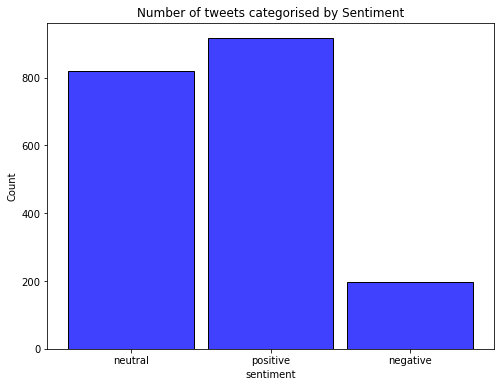

In [53]:
plt.figure(figsize = (8,6))

sns.histplot(data, x = 'sentiment', color = 'blue', shrink = 0.9)
plt.title('Number of tweets categorised by Sentiment')

plt.show()